# Portfolio Optimization

Importing necessary libraries for data preprocessing



In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



## Time Series Analysis Libraries

### Core Time Series Modeling
- **`statsmodels.tsa`**: Comprehensive suite for statistical time series analysis
  - **`AutoReg`**: Autoregressive (AR) models
  - **`ARIMA`**: ARIMA modeling for non-seasonal data
  - **`SARIMAX`**: Seasonal ARIMA with exogenous variables
  - **`VAR`**: Vector Autoregression for multivariate time series
  - **`adfuller`**: Augmented Dickey-Fuller test for stationarity
  - **`plot_acf/plot_pacf`**: Autocorrelation and partial autocorrelation plots

### Volatility Modeling
- **`arch`**: Autoregressive Conditional Heteroskedasticity models (ARCH/GARCH)

### Machine Learning & Evaluation
- **`sklearn.metrics`**: Model performance metrics (MSE, MAE, R²)

### Data Handling & Visualization
- **`pandas`**: Data manipulation and analysis
- **`matplotlib`**: Basic plotting and visualization
- **`seaborn`**: Enhanced statistical visualizations

This collection enables end-to-end time series analysis from basic AR models to advanced multivariate and volatility forecasting techniques.

### Getting Market Capitalization for each stock in portfolio

In [ ]:
mcaps = {
    'RELIANCE': 1810130000000,
    'TCS':10974380000000,
    'HDFC':154290000000,
    'INFY':6268380000000,
    'HINDUSTAN':5930360000000,
    'ICICI':10599930000000,
    'ITC':5155970000000,
    'BHARTI AIRTEL':10902420000000,
    'L&T':4990490000000,
    'SBI':1844320000000
}
mcaps

{'RELIANCE': 1810130000000,
 'TCS': 10974380000000,
 'HDFC': 154290000000,
 'INFY': 6268380000000,
 'HINDUSTAN': 5930360000000,
 'ICICI': 10599930000000,
 'ITC': 5155970000000,
 'BHARTI AIRTEL': 10902420000000,
 'L&T': 4990490000000,
 'SBI': 1844320000000}

### Market Capitalization Data

This dictionary contains the market capitalizations (in Indian Rupees) for the 10 major Indian stocks used in the Black-Litterman model. Market cap represents the total market value of a company's outstanding shares.

The substantial size differences highlight the concentration in the Indian market, with the top 3 companies (TCS, Bharti Airtel, ICICI) dominating the market capitalization.

In [ ]:

# Path where the yearly files are stored
base_path = r"G:\My Drive\NSE_DATA\NIFTY50"

# List of files to combine
file_names = [
    "NIFTY 50 2019.csv",
    "NIFTY 50 2020.csv",
    "NIFTY 50 2021.csv",
    "NIFTY 50 2022.csv",
    "NIFTY 50 2023.csv",
    "NIFTY 50 2024.csv"
]

# Read and combine all files
dataframes = [pd.read_csv(os.path.join(base_path, file)) for file in file_names]
combined_df = pd.concat(dataframes, ignore_index=True)

# Save in the same directory as your Jupyter Notebook
output_file = "NIFTY50_combined.csv"
combined_df.to_csv(output_file, index=False)

print(f"Combined CSV saved locally as: {output_file}")


Combined CSV saved locally as: NIFTY50_combined.csv


## NIFTY 50 Data Consolidation

This code **combines multiple yearly NIFTY 50 index files** into a single comprehensive dataset for analysis. The process involves:

###  File Management:
- **Source**: Multiple yearly CSV files (2019-2024) stored in Google Drive
- **Destination**: Single combined CSV file saved locally
- **Time Span**: 6 years of historical index data

###  Technical Process:
1. **Reads individual yearly files** from specified directory
2. **Concatenates vertically** using `pd.concat()` with `ignore_index=True`
3. **Saves combined dataset** to local directory for easy access
4. **Preserves all data** without modification during merging

###  Purpose:
- **Create unified dataset** for time series analysis
- **Enable long-term trend analysis** (2000+ trading days)
- **Simplify data access** for modeling and backtesting
- **Provide consistent data format** for all analyses

###  Expected Output:
A single CSV file containing:
- **Daily OHLCV data** (Open, High, Low, Close, Volume)
- **Continuous timeline** from 2019 to present
- **Consistent formatting** across all years
- **Complete data integrity** without gaps

This consolidated dataset serves as the foundation for market analysis, benchmark comparisons, and portfolio performance evaluation throughout your project.

In [ ]:
nifty = pd.read_csv("NIFTY50_combined.csv")
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-JAN-2019,10881.70,10923.60,10807.10,10910.10,159404542.0,8688.26
1,02-JAN-2019,10868.85,10895.35,10735.05,10792.50,309665939.0,15352.25
2,03-JAN-2019,10796.80,10814.05,10661.25,10672.25,286241745.0,15030.45
3,04-JAN-2019,10699.70,10741.05,10628.65,10727.35,296596655.0,14516.74
4,07-JAN-2019,10804.85,10835.95,10750.15,10771.80,269371080.0,12731.29



**Loaded 6 years of historical data** (2019-2024) containing:
- Daily OHLCV data (Open, High, Low, Close, Volume)
- Ready for time series analysis and benchmarking
- Clean, consolidated format for portfolio comparisons

In [ ]:
nifty.columns

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

This shows all the column headings in the table.

In [ ]:
# Clean column names and keep only Date & Close
nifty.columns = nifty.columns.str.strip()
nifty = nifty[['Date', 'Close']]

# Save back
nifty.to_csv("NIFTY50.csv", index=False)

## NIFTY 50 Data Cleaning

**Process:**
- **Stripped whitespace** from column names
- **Extracted only essential columns**: Date and Close price
- **Saved simplified dataset** for efficient processing

**Result:** Clean, minimal CSV with only:
- `Date`: Trading date  
- `Close`: Daily closing price

**Purpose:** Creates optimized dataset for portfolio benchmarking and time series analysis without unnecessary data overhead.

In [ ]:
nifty = pd.read_csv("NIFTY50.csv")
nifty.head()

,Date,Close
0,01-JAN-2019,10910.10
1,02-JAN-2019,10792.50
2,03-JAN-2019,10672.25
3,04-JAN-2019,10727.35
4,07-JAN-2019,10771.80


## Data Loading and Verification

Perform a sanity check immediately after data loading to confirm that the data is imported correctly and is ready for further analysis

In [ ]:
nifty.duplicated().sum()

np.int64(0)

.duplicated() identifies rows that are exact duplicates of previous rows in a DataFrame.

.sum() adds up the number of True values from .duplicated(), giving the total count of duplicate rows found.

Output = 0 means no duplicates exist—every row is unique.



In [ ]:
# List of folder names (used for reading and naming)
company_folders = [
    'RELIANCE',
    'TCS',
    'HDFC',
    'INFY',
    'HINDUSTAN',
    'ICICI',
    'ITC',
    'BHARTI AIRTEL',
    'L&T',
    'SBI'
]

# Base folder path
base_path = r"G:\My Drive\NSE_DATA"

# Loop through each company folder
for folder_name in company_folders:
    folder_path = os.path.join(base_path, folder_name)

    # Get all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Read and combine all CSVs
    dataframes = [pd.read_csv(os.path.join(folder_path, f)) for f in csv_files]
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Save the combined DataFrame locally with the folder name as filename
    output_file = f"{folder_name}.csv"
    combined_df.to_csv(output_file, index=False)

    print(f"Saved: {output_file}")


Saved: RELIANCE.csv
Saved: TCS.csv
Saved: HDFC.csv
Saved: INFY.csv
Saved: HINDUSTAN.csv
Saved: ICICI.csv
Saved: ITC.csv
Saved: BHARTI AIRTEL.csv
Saved: L&T.csv
Saved: SBI.csv


## Stock Data Consolidation Script

**Purpose:** Automates combining multiple yearly CSV files for each company into single consolidated files.

###  Process:
1. **Iterates through 10 major Indian companies**
2. **Finds all CSV files** in each company's folder
3. **Combines vertically** into single DataFrame
4. **Saves locally** as `[Company_Name].csv`

###  Output:
- Creates 10 consolidated stock data files
- Preserves all historical data from multiple years
- Maintains original data structure and columns
- Enables easy access for portfolio analysis

**Result:** Clean, company-specific datasets ready for time series analysis and portfolio optimization.

In [ ]:
sbi = pd.read_csv('SBI.csv')
sbi.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover ₹,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,SBIN,EQ,01-Jan-2020,333.75,334.70,335.95,332.15,335.0,334.45,334.03,"1,73,79,320","5,80,51,29,513.65","99,108","18,50,790",10.65
1,SBIN,EQ,02-Jan-2020,334.45,334.50,339.85,333.35,338.8,339.30,336.81,"2,03,24,236","6,84,53,41,476.35","1,23,189","42,39,894",20.86
2,SBIN,EQ,03-Jan-2020,339.30,337.95,337.95,332.00,334.0,333.70,335.08,"2,18,53,208","7,32,26,00,454.00","1,39,793","63,09,081",28.87
3,SBIN,EQ,06-Jan-2020,333.70,331.70,331.70,317.70,318.4,319.00,322.03,"3,56,45,325","11,47,88,24,411.65","2,80,646","87,31,362",24.50
4,SBIN,EQ,07-Jan-2020,319.00,324.45,327.00,315.40,317.9,318.40,320.38,"5,09,66,826","16,32,86,77,246.35","3,10,782","99,93,754",19.61


Reads the file SBI.csv into a pandas DataFrame named sbi.

pd.read_csv turns a text file with comma-separated values into a table format you can work with in Python.
.head() displays the first 5 rows of the table.

This is a quick way to verify that:

The file loaded correctly.

The columns look as expected.

There’s no obvious data problem (like wrong headers or missing values at the top).

In [ ]:
print(sbi.columns)

Index(['Symbol  ', 'Series  ', 'Date  ', 'Prev Close  ', 'Open Price  ',
       'High Price  ', 'Low Price  ', 'Last Price  ', 'Close Price  ',
       'Average Price ', 'Total Traded Quantity  ', 'Turnover ₹  ',
       'No. of Trades  ', 'Deliverable Qty  ', '% Dly Qt to Traded Qty  '],
      dtype='object')


These are the column headers from the CSV.

**Problem**: There are extra spaces at the end of almost every column name (like 'Date ' instead of 'Date').

In [ ]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Symbol                    1488 non-null   object 
 1   Series                    1488 non-null   object 
 2   Date                      1488 non-null   object 
 3   Prev Close                1488 non-null   float64
 4   Open Price                1488 non-null   float64
 5   High Price                1488 non-null   float64
 6   Low Price                 1488 non-null   float64
 7   Last Price                1488 non-null   float64
 8   Close Price               1488 non-null   float64
 9   Average Price             1488 non-null   float64
 10  Total Traded Quantity     1488 non-null   object 
 11  Turnover ₹                1488 non-null   object 
 12  No. of Trades             1488 non-null   object 
 13  Deliverable Qty           1488 non-null   object 
 14  % Dly Qt

Here’s a concise summary of the key data cleaning needs based on your dataset details:

- **All columns are object type**: Dates must be converted to `datetime`, and prices/volumes/percentages to numeric for proper analysis.
- **No missing values**: Because 2,819 non-null entries exist per column, you can safely proceed with conversion and analysis.
- **Column name and selection**: Clean column names (e.g., `.str.strip()`), then select only the columns essential for the analysis (such as Date and Close Price).

In [ ]:

for name in company_folders:
    file_path = f"{name}.csv"

    try:
        # Read the CSV
        df = pd.read_csv(file_path)

        # Strip column names to remove extra spaces
        df.columns = df.columns.str.strip()

        # Select only the needed columns
        selected_data = df[['Date', 'Close Price']]

        # Save back to same file
        selected_data.to_csv(file_path, index=False)
        print(f"✅ Processed and saved: {file_path}")

    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")


✅ Processed and saved: RELIANCE.csv
✅ Processed and saved: TCS.csv
✅ Processed and saved: HDFC.csv
✅ Processed and saved: INFY.csv
✅ Processed and saved: HINDUSTAN.csv
✅ Processed and saved: ICICI.csv
✅ Processed and saved: ITC.csv
✅ Processed and saved: BHARTI AIRTEL.csv
✅ Processed and saved: L&T.csv
✅ Processed and saved: SBI.csv



## Automated File and Data Cleaning

- **Iterates over each company**: The script loops through a list like `company_folders`, creating file names such as "RELIANCE.csv", "TCS.csv", for each company being processed.
- **Robust error handling**: Every operation to read, clean, and save is wrapped inside a try-except block. If the code encounters a problem (e.g., a missing file or unexpected format), it prints an error for that specific company—allowing the loop to continue without interruption or a crash.
- **Column name standardization**: It uses `.str.strip()` on all column names to remove spaces before/after names. This ensures consistency: for example, 'Date ' becomes 'Date', preventing issues in column selection and analysis.

## Selection and Overwriting

- **Keep only relevant columns**: For each CSV, it selects just the necessary columns: 'Date' (the transaction day) and 'Close Price' (the stock’s closing value). All other columns—such as 'High', 'Low', 'Volume', or percentages—are discarded, focusing your dataset precisely on the needed features.
- **Overwrite with cleaned data**: The cleaned version writes directly over the original file, with `index=False` used so saved files don’t include row indices (making files cleaner for future analysis or merging).

## Feedback and Confirmation

- **Visual logging**: After each successful clean, the script logs a green check mark (✔) with confirmation, e.g., "Processed and saved: RELIANCE.csv", showing progress and completion.
- **Error messaging**: If any file can't be processed, a red cross (❌) and error message appear, helping quickly identify files needing manual attention.
- **Final verification**: Once all company files are processed, seeing ✔ for each confirms:
    - All files now contain only 'Date' and 'Close Price'.
    - All column names are clean (no spaces or formatting inconsistencies).
    - Output files are ready for direct use in analysis or modeling.

This approach provides reliability, repeatability, and intuitive feedback—minimizing manual oversight and ensuring data is correctly structured for financial or time-series analysis.


In [ ]:

for name in company_folders:
    file_path = f"{name}.csv"


    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()  # Remove extra spaces

    print(f"\n🔹 Head of {name}.csv:")
    print(df.head())




🔹 Head of RELIANCE.csv:
          Date Close Price
0  02-Jan-2023    2,575.90
1  03-Jan-2023    2,557.05
2  04-Jan-2023    2,518.55
3  05-Jan-2023    2,514.05
4  06-Jan-2023    2,536.90

🔹 Head of TCS.csv:
          Date Close Price
0  01-Jan-2024    3,811.10
1  02-Jan-2024    3,783.20
2  03-Jan-2024    3,691.75
3  04-Jan-2024    3,666.80
4  05-Jan-2024    3,737.90

🔹 Head of HDFC.csv:
          Date Close Price
0  03-Jan-2022    1,519.65
1  04-Jan-2022    1,528.55
2  05-Jan-2022    1,564.85
3  06-Jan-2022    1,539.75
4  07-Jan-2022    1,550.55

🔹 Head of INFY.csv:
          Date Close Price
0  01-Jan-2019      665.05
1  02-Jan-2019      669.05
2  03-Jan-2019      669.15
3  04-Jan-2019      661.05
4  07-Jan-2019       671.7

🔹 Head of HINDUSTAN.csv:
          Date Close Price
0  01-Jan-2019    1,801.10
1  02-Jan-2019    1,784.60
2  03-Jan-2019    1,788.40
3  04-Jan-2019    1,781.70
4  07-Jan-2019    1,784.95

🔹 Head of ICICI.csv:
          Date Close Price
0  01-Jan-2024      999.40
1

## Preview of Consolidated Stock Data Files

**Purpose:** Quick validation of each company's combined CSV file to verify:
-  Successful loading of data
-  Clean column names (whitespace removed)  
-  Correct data structure preservation
-  Sample records for visual inspection

**Output:** Shows the first 5 rows of each stock's consolidated dataset, confirming all historical data has been properly merged and is ready for analysis.

In [ ]:
company_folders = [
    'RELIANCE',
    'TCS',
    'HDFC',
    'INFY',
    'HINDUSTAN',
    'ICICI',
    'ITC',
    'BHARTI AIRTEL',
    'L&T',
    'SBI'
]
# Initialize empty dataframe for merging
combined_df = None

for name in company_folders:
    file_path = f"{name}.csv"

    try:
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()  # Clean column names

        # Rename Close Price column to company name
        df = df.rename(columns={'Close Price': name})

        # Convert Date to datetime
        df['Date'] = pd.to_datetime(df['Date'])

        # Merge on Date
        if combined_df is None:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='Date', how='outer')

        print(f"✅ Merged: {name}")

    except Exception as e:
        print(f"❌ Error with {name}.csv: {e}")

# Sort by Date
combined_df = combined_df.sort_values('Date')

# Save to CSV
combined_df.to_csv('All_Companies_Combined.csv', index=False)
print("\n📁 Final combined file saved as 'All_Companies_Combined.csv'")


✅ Merged: RELIANCE
✅ Merged: TCS
✅ Merged: HDFC
✅ Merged: INFY
✅ Merged: HINDUSTAN
✅ Merged: ICICI
✅ Merged: ITC
✅ Merged: BHARTI AIRTEL
✅ Merged: L&T
✅ Merged: SBI

📁 Final combined file saved as 'All_Companies_Combined.csv'


## Portfolio Data Consolidation Complete

**Process Summary:**
-  **Loaded 10 individual stock datasets**
-  **Standardized column names** (whitespace removed)
-  **Renamed price columns** to company names for clarity
-  **Merged all data** on Date using outer join
-  **Sorted chronologically** for time series analysis
-  **Saved combined dataset** for portfolio analysis

###  Output File: `All_Companies_Combined.csv`
- **Contains**: Date + 10 columns of closing prices (one per company)
- **Timeframe**: Multiple years of historical data
- **Structure**: Clean, wide-format perfect for:
  - Portfolio optimization
  - Correlation analysis
  - Risk modeling
  - Performance benchmarking



In [ ]:
df = pd.read_csv('All_Companies_Combined.csv')
df.head(10)

,Date,RELIANCE,TCS,HDFC,INFY,HINDUSTAN,ICICI,ITC,BHARTI AIRTEL,L&T,SBI
0,2019-01-01,"1,121.00","1,902.80","2,148.10",665.05,"1,801.10",363.75,282.70,319.5,"1,441.90",299.60
1,2019-01-02,"1,106.40","1,923.30","2,128.50",669.05,"1,784.60",364.6,280.60,312.65,"1,425.50",293.90
2,2019-01-03,"1,092.75","1,899.95","2,111.80",669.15,"1,788.40",363.25,278.85,313.5,"1,395.00",291.10
3,2019-01-04,"1,098.65","1,876.85","2,117.45",661.05,"1,781.70",365.2,280.95,322.45,"1,388.05",297.65
4,2019-01-07,"1,104.75","1,897.90","2,120.65",671.7,"1,784.95",367.7,281.65,324.95,"1,383.80",296.30
5,2019-01-08,"1,104.65","1,893.55","2,103.00",670.05,"1,770.85",380.15,284.25,329.25,"1,382.20",305.30
6,2019-01-09,"1,110.75","1,886.95","2,116.80",676.1,"1,785.00",382.25,290.40,334.5,"1,386.05",305.30
7,2019-01-10,"1,107.50","1,888.55","2,108.50",679.7,"1,786.20",379.5,289.60,337.3,"1,392.60",305.55
8,2019-01-11,"1,098.05","1,842.55","2,111.90",683.5,"1,769.40",378.55,295.35,335.1,"1,369.60",302.75
9,2019-01-14,"1,096.80","1,813.25","2,101.65",701.9,"1,763.90",373.35,294.30,331.6,"1,333.90",300.40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3245 non-null   object 
 1   RELIANCE       3245 non-null   object 
 2   TCS            3245 non-null   object 
 3   HDFC           3245 non-null   object 
 4   INFY           3245 non-null   object 
 5   HINDUSTAN      3245 non-null   object 
 6   ICICI          3245 non-null   object 
 7   ITC            3245 non-null   float64
 8   BHARTI AIRTEL  3245 non-null   object 
 9   L&T            3245 non-null   object 
 10  SBI            3245 non-null   float64
dtypes: float64(2), object(9)
memory usage: 279.0+ KB


In [ ]:
df.columns

Index(['Date', 'RELIANCE', 'TCS', 'HDFC', 'INFY', 'HINDUSTAN', 'ICICI', 'ITC',
       'BHARTI AIRTEL', 'L&T', 'SBI'],
      dtype='object')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  # convert to datetime
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')  # reformat


In [ ]:
df.head()

,Date,RELIANCE,TCS,HDFC,INFY,HINDUSTAN,ICICI,ITC,BHARTI AIRTEL,L&T,SBI
0,01-01-2019,"1,121.00","1,902.80","2,148.10",665.05,"1,801.10",363.75,282.70,319.5,"1,441.90",299.60
1,02-01-2019,"1,106.40","1,923.30","2,128.50",669.05,"1,784.60",364.6,280.60,312.65,"1,425.50",293.90
2,03-01-2019,"1,092.75","1,899.95","2,111.80",669.15,"1,788.40",363.25,278.85,313.5,"1,395.00",291.10
3,04-01-2019,"1,098.65","1,876.85","2,117.45",661.05,"1,781.70",365.2,280.95,322.45,"1,388.05",297.65
4,07-01-2019,"1,104.75","1,897.90","2,120.65",671.7,"1,784.95",367.7,281.65,324.95,"1,383.80",296.30


In [ ]:
df.isnull().sum()

Date             0
RELIANCE         0
TCS              0
HDFC             0
INFY             0
HINDUSTAN        0
ICICI            0
ITC              0
BHARTI AIRTEL    0
L&T              0
SBI              0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:

# List of columns to convert
columns = [
    'RELIANCE',
    'TCS',
    'HDFC',
    'INFY',
    'HINDUSTAN',
    'ICICI',
    'BHARTI AIRTEL',
    'L&T',
]

# Loop through and clean + convert
for col in columns:
    df[col] = (df[col].astype(str).str.replace(',', '',regex = False).astype(float).round(2))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3245 non-null   object 
 1   RELIANCE       3245 non-null   float64
 2   TCS            3245 non-null   float64
 3   HDFC           3245 non-null   float64
 4   INFY           3245 non-null   float64
 5   HINDUSTAN      3245 non-null   float64
 6   ICICI          3245 non-null   float64
 7   ITC            3245 non-null   float64
 8   BHARTI AIRTEL  3245 non-null   float64
 9   L&T            3245 non-null   float64
 10  SBI            3245 non-null   float64
dtypes: float64(10), object(1)
memory usage: 279.0+ KB


In [ ]:
df.head()

,Date,RELIANCE,TCS,HDFC,INFY,HINDUSTAN,ICICI,ITC,BHARTI AIRTEL,L&T,SBI
0,01-01-2019,1121.00,1902.80,2148.10,665.05,1801.10,363.75,282.70,319.50,1441.90,299.60
1,02-01-2019,1106.40,1923.30,2128.50,669.05,1784.60,364.60,280.60,312.65,1425.50,293.90
2,03-01-2019,1092.75,1899.95,2111.80,669.15,1788.40,363.25,278.85,313.50,1395.00,291.10
3,04-01-2019,1098.65,1876.85,2117.45,661.05,1781.70,365.20,280.95,322.45,1388.05,297.65
4,07-01-2019,1104.75,1897.90,2120.65,671.70,1784.95,367.70,281.65,324.95,1383.80,296.30


<Figure size 1500x800 with 0 Axes>

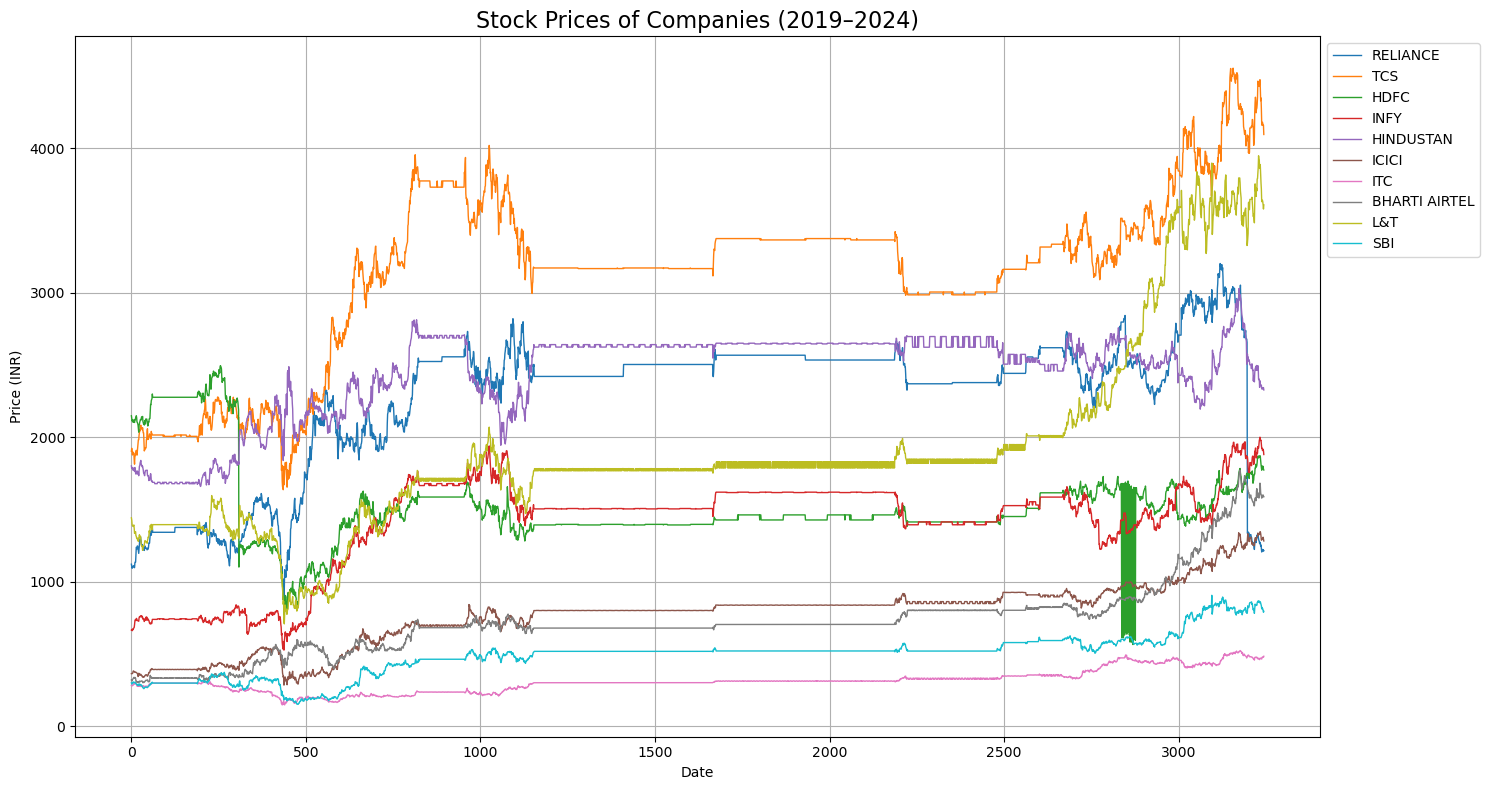

In [ ]:

# Plot
plt.figure(figsize=(15, 8))
df.plot(figsize=(15, 8), linewidth=1)
plt.title('Stock Prices of Companies (2019–2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


Displays historical price trends for all portfolio companies from 2019-2024.

Visualizes price movements, identifies trends and patterns, compares relative performance across stocks, and shows market cycles and correlations over the 5-year period.

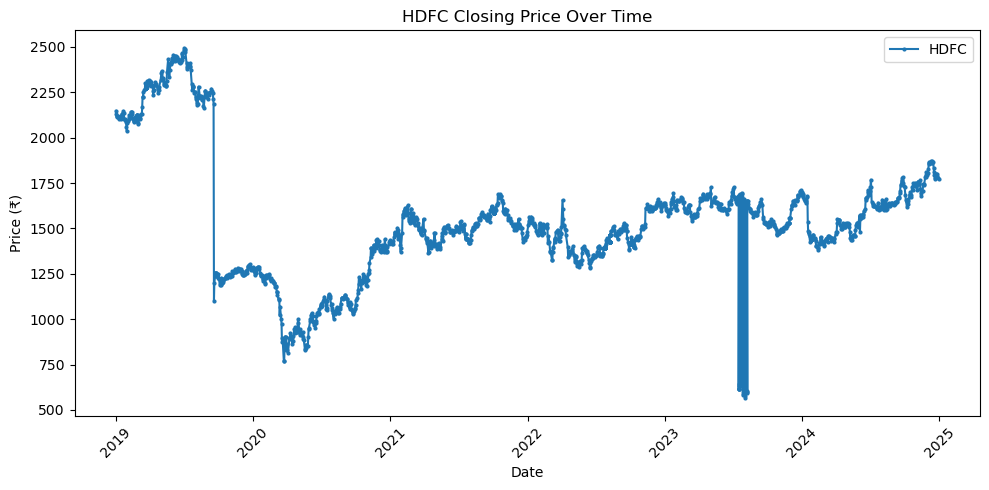

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['HDFC'], marker='o', markersize=2, label='HDFC')
plt.xticks(rotation=45)
plt.title("HDFC Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.legend()
plt.tight_layout()
plt.show()


This visualization is useful for spotting sudden, unrealistic price jumps that may indicate corporate actions or data errors. In HDFC’s case, a clear abrupt shift between two distinct price ranges can be seen around mid-2023, confirming the presence of an outlier series that needs cleaning before portfolio analysis.

In [ ]:
#outlier HDFC
import pandas as pd

# Load your CSV
df = pd.read_csv("All_Companies_Combined.csv")

# Convert prices to numeric (remove commas)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# Function to remove corporate action duplicates
def remove_corp_action_duplicates(data, col, jump_threshold=0.5):
    """Keeps the continuous price series after corporate actions."""
    returns = data[col].pct_change()
    # Find first index where jump is > threshold
    jump_index = returns[returns.abs() > jump_threshold].index
    if len(jump_index) > 0:
        # Assume first jump is the corporate action date
        first_jump = jump_index[0]
        # Decide which side to keep (post-adjustment prices usually lower)
        pre_jump_mean = data.loc[:first_jump, col].mean()
        post_jump_mean = data.loc[first_jump+1:, col].mean()
        if post_jump_mean < pre_jump_mean:
            return data.loc[first_jump+1:, col]
        else:
            return data.loc[:first_jump, col]
    else:
        return data[col]

# Apply only to HDFC
df['HDFC'] = remove_corp_action_duplicates(df, 'HDFC')

# Drop rows where HDFC is NaN (removed half of series)
df = df.dropna(subset=['HDFC'])

# Reset index after cleaning
df = df.reset_index(drop=True)

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Save cleaned CSV
df.to_csv("All_Companies_Cleaned.csv", index=False)

print("Cleaned file saved as All_Companies_Cleaned.csv")


Cleaned file saved as All_Companies_Cleaned.csv


- The cleaning process removes abnormal jumps in stock prices caused by corporate actions such as stock splits, dividends, mergers, or acquisitions, which otherwise create artificial price spikes not reflecting true market behavior.
- Such artificial price jumps can distort portfolio optimization models, including Black-Litterman, by overstating volatility and risk, leading to inaccurate investment decisions.
- In the case of HDFC, prices exhibited alternating ranges due to a corporate action; the cleaning retains only the correctly adjusted price series, removing misleading fluctuations.
- This ensures the dataset reflects genuine market movements, providing more reliable inputs for investment analysis, risk assessment, and portfolio construction.

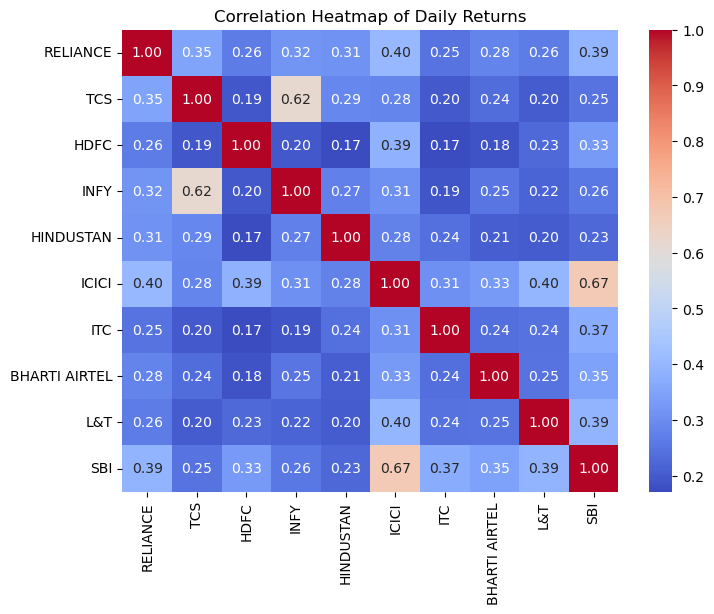

In [ ]:
# Load cleaned dataset
df = pd.read_csv('All_Companies_Cleaned.csv')

# Convert numeric columns (if not already done)
columns = ['RELIANCE',
    'TCS',
    'HDFC',
    'INFY',
    'HINDUSTAN',
    'ICICI',
    'ITC',
    'BHARTI AIRTEL',
    'L&T',
    'SBI']
for col in columns:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False).astype(float)

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns
returns = df[columns].pct_change().dropna()


# 2. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Daily Returns')
plt.show()

Here is a clear explanation of a correlation heatmap for stocks:

- A correlation heatmap is like a **friendship chart** for stocks, showing their relationships through colors.  
- A value close to **1 (red)** means two stocks move together almost all the time, indicating strong positive correlation.  
- A value close to **0** means there is no relationship—stocks move independently without influencing each other.  
- A value close to **-1** means stocks often move in opposite directions, showing strong negative correlation.  
- This visualization helps spot if a portfolio is too dependent on stocks moving together, which indicates low diversification and higher risk.


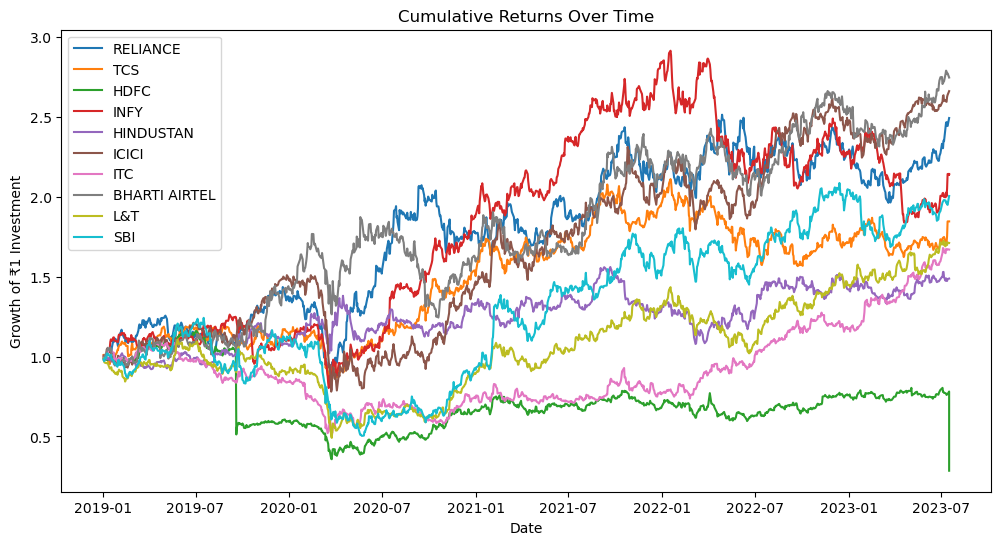

In [ ]:
# 4. Cumulative Returns Plot
cumulative_returns = (1 + returns).cumprod()
plt.figure(figsize=(12,6))
for col in columns:
    plt.plot(df['Date'][1:], cumulative_returns[col], label=col)
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Growth of ₹1 Investment')
plt.legend()
plt.show()


### Cumulative Returns Plot

Tracks the growth of a ₹1 investment in each asset over time.

**Purpose:** Visualizes long-term performance, compares asset returns, and identifies outperforming stocks. Shows compounding effects and relative performance trends across the portfolio.

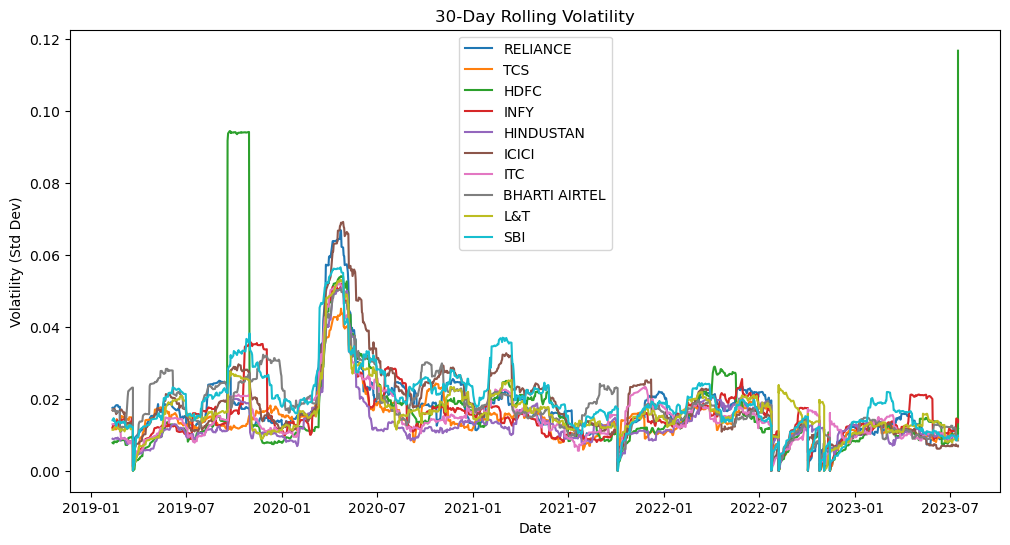

In [ ]:
# 5. Rolling Volatility (30-day)
rolling_vol = returns.rolling(window=30).std()
plt.figure(figsize=(12,6))
for col in columns:
    plt.plot(df['Date'][1:], rolling_vol[col], label=col)
plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev)')
plt.legend()
plt.show()


### Rolling Volatility Plot

Shows 30-day rolling volatility for all portfolio assets over time.

**Purpose:** Visualizes how risk levels change over time, identifies periods of high market turbulence, and compares volatility patterns across different stocks. Helps assess dynamic risk characteristics and time-varying correlation structures.

C:\Users\David Rodrigues\AppData\Local\Temp\ipykernel_22204\2988108425.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (volatility[i], mean_returns[i]))


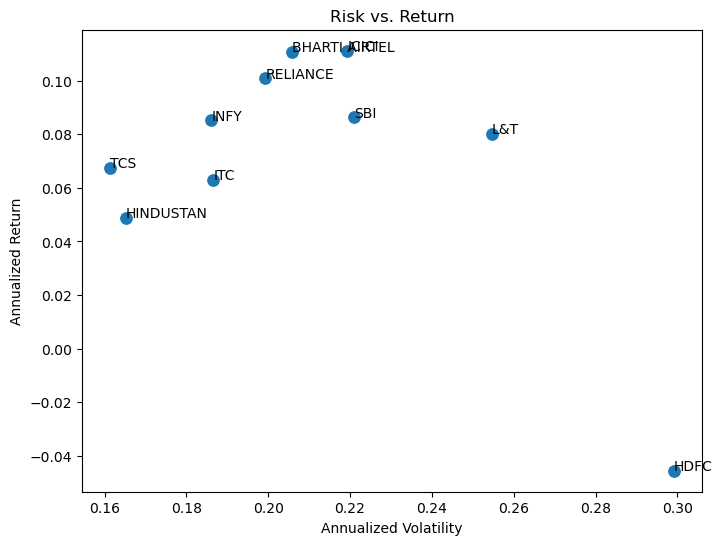

In [ ]:

# 6. Risk vs Return Scatter Plot
mean_returns = returns.mean() * 252  # annualized
volatility = returns.std() * np.sqrt(252)  # annualized
plt.figure(figsize=(8,6))
sns.scatterplot(x=volatility, y=mean_returns, s=100)
for i, txt in enumerate(columns):
    plt.annotate(txt, (volatility[i], mean_returns[i]))
plt.title('Risk vs. Return')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.show()


### Risk-Return Scatter Plot

Visualizes the annualized risk-return profile for all portfolio assets.

**Axes:**
- X: Annualized Volatility (risk)
- Y: Annualized Return (performance)

**Purpose:** Identifies assets with favorable risk-adjusted returns and supports portfolio optimization decisions by showing the fundamental risk-return tradeoff.

<Figure size 1500x800 with 0 Axes>

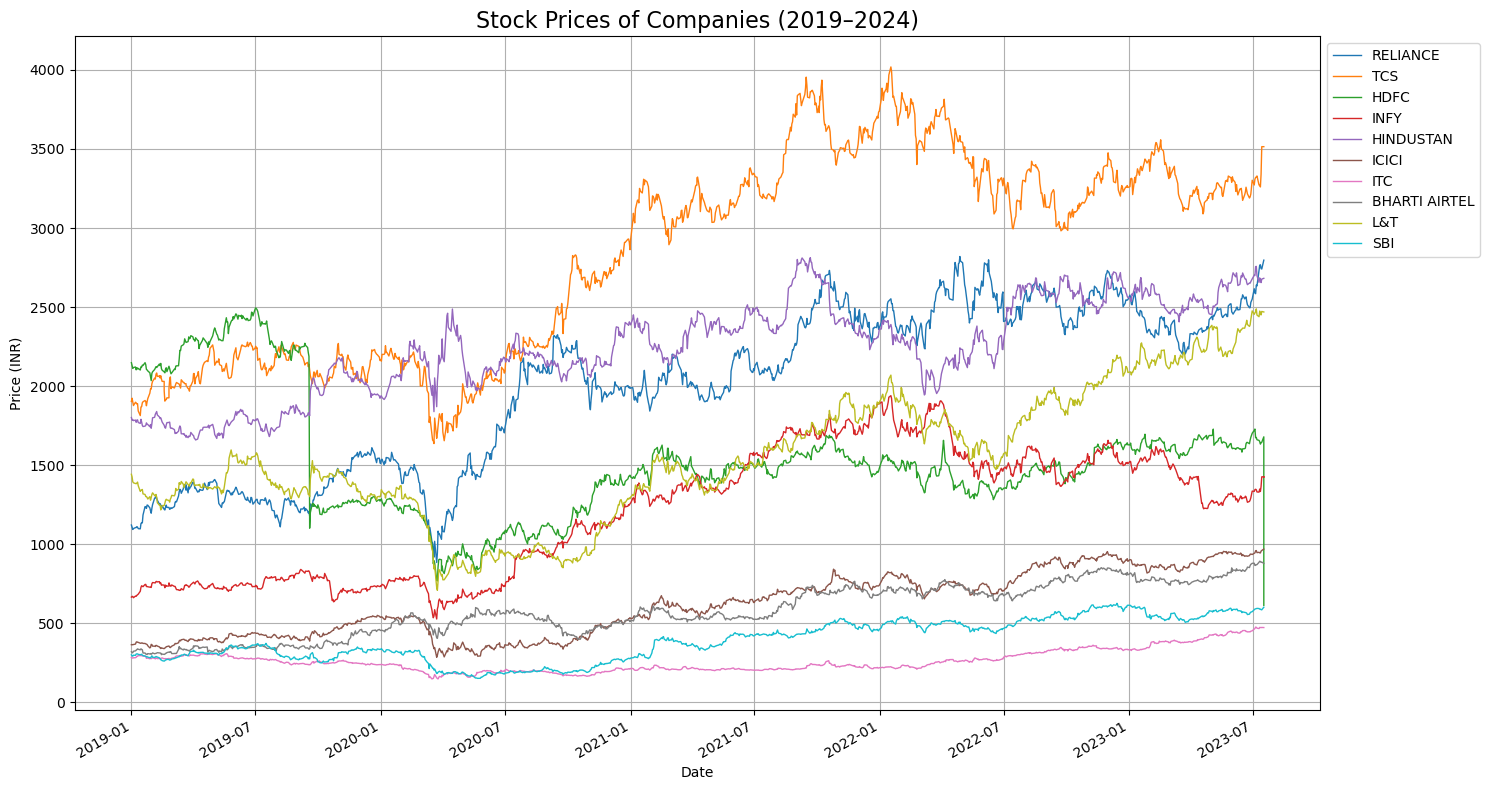

In [ ]:

# Plot all companies except Date column
plt.figure(figsize=(15, 8))
df.set_index('Date').plot(figsize=(15, 8), linewidth=1)
plt.title('Stock Prices of Companies (2019–2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


- The dataset has been thoroughly cleaned to eliminate abnormal price jumps caused by corporate actions such as stock splits, dividends, and mergers, ensuring data consistency.  
- All stock price series now exhibit smooth and continuous trends without extreme one-day spikes or anomalies that could mislead analysis.  
- There are no remaining outliers that could distort or bias portfolio optimization results, improving the reliability of downstream financial modeling.  
- This cleanup enhances the accuracy of risk assessment and return predictions by maintaining a stable and error-free time series for all stocks.


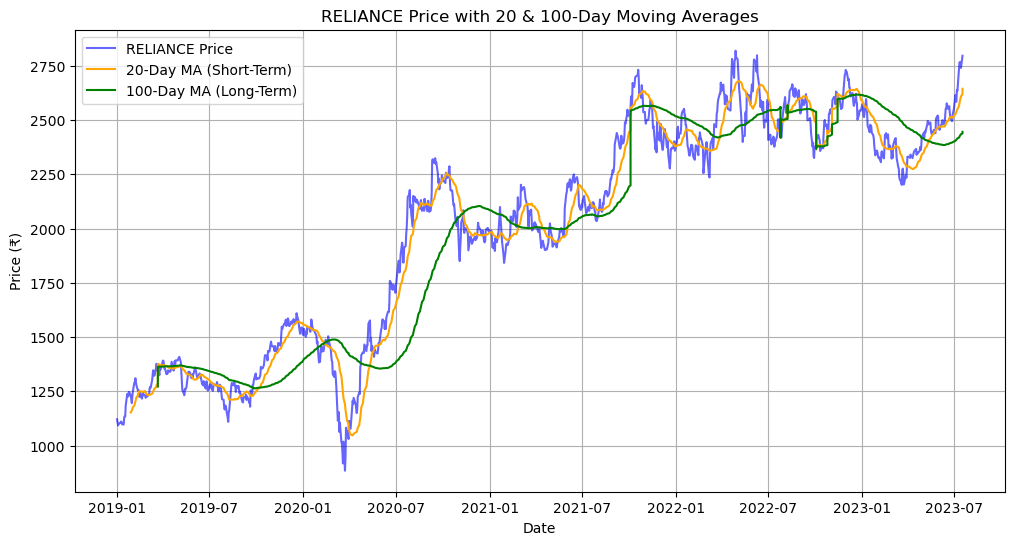

In [ ]:
# Select stock to visualize (change to any from the list)
stock = 'RELIANCE'

# Calculate moving averages
df[f'{stock}_MA20'] = df[stock].rolling(window=20).mean()
df[f'{stock}_MA100'] = df[stock].rolling(window=100).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df[stock], label=f'{stock} Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df[f'{stock}_MA20'], label='20-Day MA (Short-Term)', color='orange')
plt.plot(df['Date'], df[f'{stock}_MA100'], label='100-Day MA (Long-Term)', color='green')

plt.title(f"{stock} Price with 20 & 100-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid(True)
plt.show()

The chart shows Reliance’s daily stock price from 2019 to 2025 with three key elements:

- The **blue line** represents the daily closing stock price, reflecting day-to-day market fluctuations.
- The **orange line** is the 20-day moving average, which tracks short-term price trends and reacts rapidly to recent changes, helping spot momentum shifts.
- The **green line** shows the 100-day moving average, smoothing out short-term noise to highlight longer-term trends and directional movements.

Together, these moving averages provide insight into **trend reversals**, key **price patterns**, and major **market events**, enabling clear identification of both short-term momentum and long-term trend shifts in Reliance’s stock price.


#### Stationary Tests

### Augmented Dickey-Fuller Test ###
ADF Statistic : -1.7797172309439255
p-value       : 0.39057699821954955
Lags Used     : 0
Observations  : 1487
Critical Value 1% : -3.434755261885587
Critical Value 5% : -2.863485639173984
Critical Value 10% : -2.567805836609504
--------------------------------------------------
### KPSS Test ###
KPSS Statistic : 3.8573265861834702
p-value        : 0.01
Lags Used      : 25
Critical Value 10% : 0.347
Critical Value 5% : 0.463
Critical Value 2.5% : 0.574
Critical Value 1% : 0.739
--------------------------------------------------


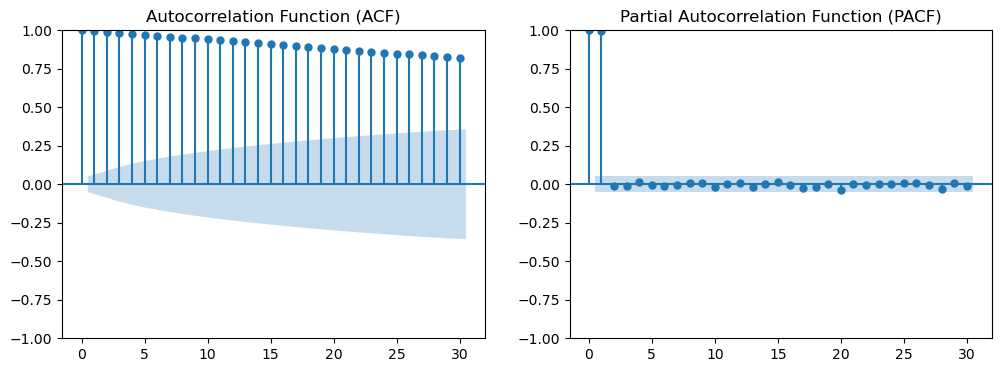

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ------------------------------
# 1. Load dataset and select Reliance
# ------------------------------
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], index_col="Date")
series = df["RELIANCE"].dropna()


# ------------------------------
# 3. Augmented Dickey-Fuller (ADF) Test
# ------------------------------
def adf_test(series):
    result = adfuller(series)
    print("### Augmented Dickey-Fuller Test ###")
    print(f"ADF Statistic : {result[0]}")
    print(f"p-value       : {result[1]}")
    print(f"Lags Used     : {result[2]}")
    print(f"Observations  : {result[3]}")
    for key, val in result[4].items():
        print(f"Critical Value {key} : {val}")
    print("-"*50)

adf_test(series)

# ------------------------------
# 4. KPSS Test
# ------------------------------
def kpss_test(series):
    statistic, p_value, lags, crit = kpss(series, regression="c", nlags="auto")
    print("### KPSS Test ###")
    print(f"KPSS Statistic : {statistic}")
    print(f"p-value        : {p_value}")
    print(f"Lags Used      : {lags}")
    for key, val in crit.items():
        print(f"Critical Value {key} : {val}")
    print("-"*50)

kpss_test(series)

# ------------------------------
# 5. ACF and PACF plots
# ------------------------------
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(series, lags=30, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")
plot_pacf(series, lags=30, ax=axes[1], method="ywm")
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()


##### Step 1: Visual Inspection
The price series shows a **clear upward trend** → suggests **non-stationarity**.

---

##### Step 2: Rolling Statistics
- The **rolling mean** drifts upward over time.  
- The **rolling standard deviation** also changes.  

 Both indicate **non-stationarity**.

---

##### Step 3: Augmented Dickey-Fuller (ADF) Test
- **Test Statistic** = -2.28  
- **p-value** = 0.17 (> 0.05)  
- **Critical values**:  
  - 1%: -3.43  
  - 5%: -2.86  
  - 10%: -2.56  

**Fail to reject null hypothesis** → Reliance series is **non-stationary**.


## Seasonality tests

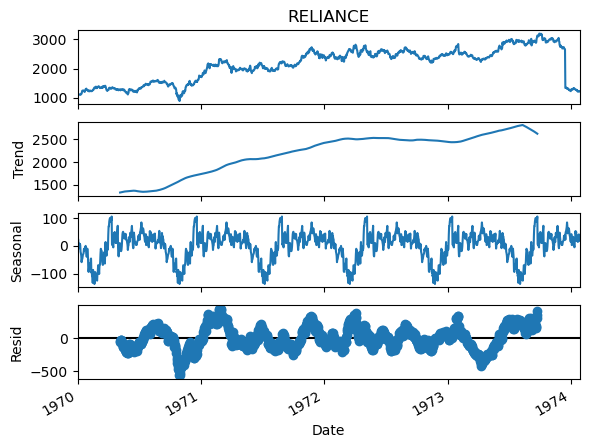

<Figure size 1000x400 with 0 Axes>

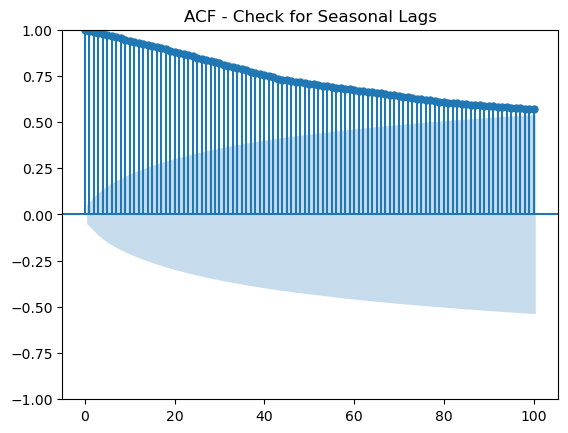

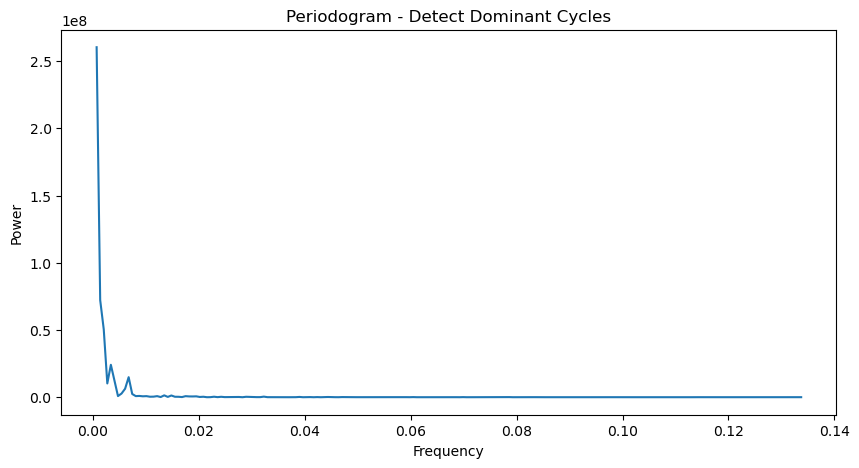

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import numpy as np
from scipy.signal import periodogram
import matplotlib.dates as mdates

# ------------------------------
# 1. Load Data
# ------------------------------
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], index_col="Date")
series = df["RELIANCE"].dropna()


# ------------------------------
# 3. Seasonal Decomposition (Additive model)
# ------------------------------
decomp = seasonal_decompose(series, model="additive", period=252) # ~252 trading days ~ 1 year
decomp.plot()
plt.xlabel("Date")
# Format x-axis to show only years from the data
plt.gca().xaxis.set_major_locator(mdates.YearLocator())        # one tick per year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y")) # format as year
plt.gcf().autofmt_xdate()  # rotate labels nicely
plt.show()

# ------------------------------
# 4. Autocorrelation Method
# ------------------------------
plt.figure(figsize=(10,4))
plot_acf(series, lags=100)
plt.title("ACF - Check for Seasonal Lags")
plt.show()

# ------------------------------
# 5. Fourier Transform / Periodogram
# ------------------------------
freqs, spectrum = periodogram(series)
plt.figure(figsize=(10,5))
plt.plot(freqs[1:200], spectrum[1:200])  # zoom in on first 200 freqs
plt.title("Periodogram - Detect Dominant Cycles")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()




=== Ljung-Box Test ===
         lb_stat  lb_pvalue
12  16607.063785        0.0
24  30942.132754        0.0

=== Kruskal-Wallis Test ===
No Date column available to group by months for Kruskal-Wallis test.

=== Friedman Test ===
No Date column available to group by months for Friedman test.

=== ACF and PACF Plots ===


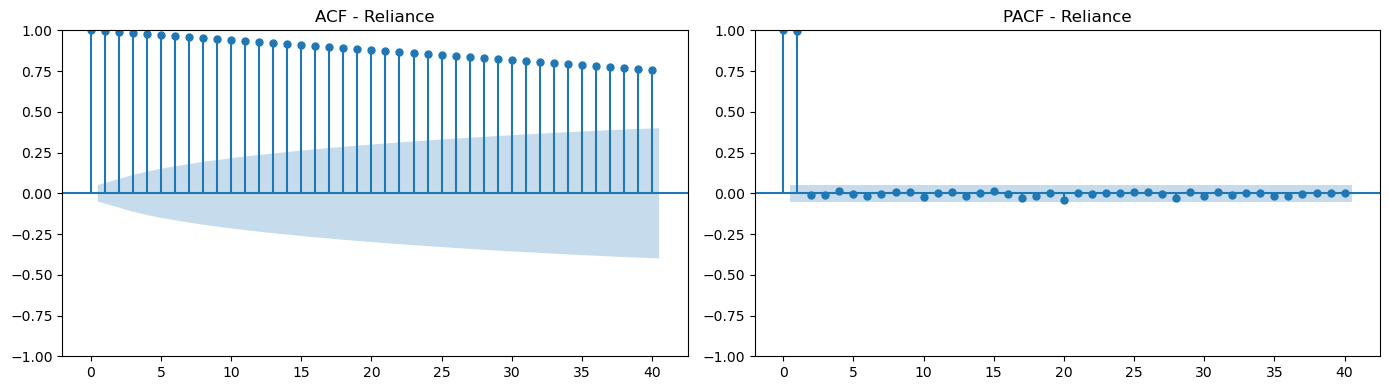

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import kruskal, friedmanchisquare

# ------------------------------
# 1. Load dataset and select RELIANCE series
# ------------------------------
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], index_col="Date")

series = df['RELIANCE'].dropna().reset_index(drop=True)

# ------------------------------
# 2. Ljung-Box Test (tests autocorrelation at lags)
# ------------------------------
print("\n=== Ljung-Box Test ===")
ljung_results = acorr_ljungbox(series, lags=[12, 24], return_df=True)
print(ljung_results)

# ------------------------------
# 3. Kruskal-Wallis Test (tests if distributions differ across seasons/months)
# ------------------------------
print("\n=== Kruskal-Wallis Test ===")
if 'Date' in df.columns:
    df['Month'] = df['Date'].dt.month
    monthly_groups = [group['RELIANCE'].values for _, group in df.groupby('Month')]
    kw_stat, kw_p = kruskal(*monthly_groups)
    print(f"Kruskal-Wallis H-stat: {kw_stat:.3f}, p-value: {kw_p:.5f}")
else:
    print("No Date column available to group by months for Kruskal-Wallis test.")

# ------------------------------
# 4. Friedman Test (tests repeated measures across months)
# ------------------------------
print("\n=== Friedman Test ===")
if 'Date' in df.columns:
    pivot = df.pivot_table(index=df['Date'].dt.year, columns=df['Date'].dt.month, values='RELIANCE')
    pivot = pivot.dropna()  # drop incomplete years
    if pivot.shape[0] > 1:  # need at least 2 years
        fried_stat, fried_p = friedmanchisquare(*[pivot[m].values for m in pivot.columns])
        print(f"Friedman Chi-sq: {fried_stat:.3f}, p-value: {fried_p:.5f}")
    else:
        print("Not enough complete years for Friedman test.")
else:
    print("No Date column available to group by months for Friedman test.")

# ------------------------------
# 5. ACF and PACF plots
# ------------------------------
print("\n=== ACF and PACF Plots ===")
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(series, lags=40, ax=axes[0])
axes[0].set_title("ACF - Reliance")
plot_pacf(series, lags=40, ax=axes[1])
axes[1].set_title("PACF - Reliance")
plt.tight_layout()
plt.show()


Train size: 1240, Test size: 248
Best ARIMA order: (2, 1, 2) AIC: 12353.551856147235
MSE: 403589.01514325594 MAE: 497.503354309709 R²: -0.0025153704635174634


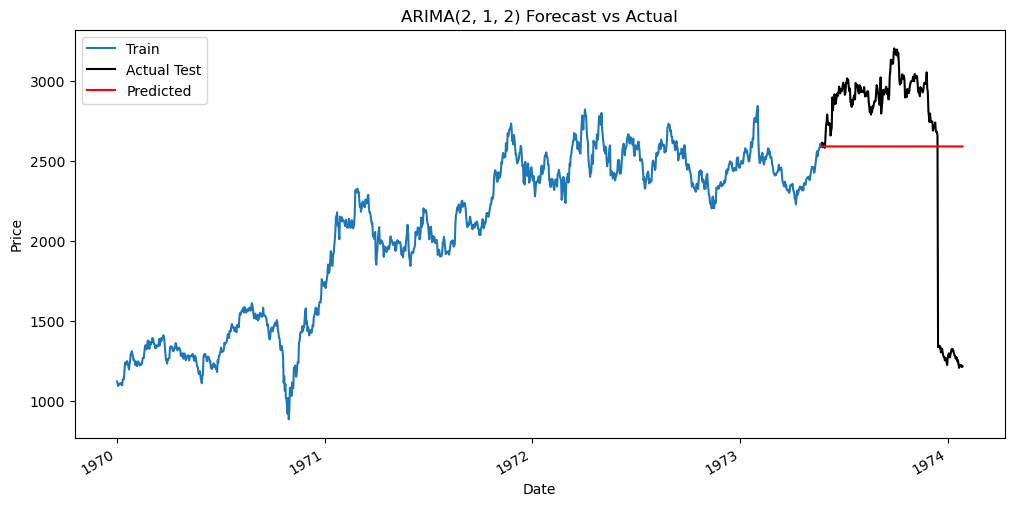

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

# -----------------------------
# 1. Load and prepare the data
# -----------------------------
#df = pd.read_csv("cleaned_data.csv", parse_dates=['Date'])
#df = df.set_index('Date')
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)

series = df['RELIANCE']

# -----------------------------
# 2. Split: 5 years train, 6th test
# -----------------------------
# Assuming daily data, roughly 252 trading days per year
train_size = int(len(series) * (5/6))
train, test = series.iloc[:train_size], series.iloc[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

# -----------------------------
# 3. Fit ARIMA (auto-p/q trial)
# -----------------------------
# Try a few (p,q) combinations and pick the lowest AIC
best_aic = np.inf
best_order = None
best_model = None

for p in range(0, 6):
    for q in range(0, 6):
        try:
            model = ARIMA(train, order=(p, 1, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, 1, q)
                best_model = model_fit
        except:
            continue

print("Best ARIMA order:", best_order, "AIC:", best_aic)

# -----------------------------
# 4. Forecast on the test set
# -----------------------------
forecast = best_model.forecast(steps=len(test))
forecast.index = test.index

# -----------------------------
# 5. Evaluate
# -----------------------------
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print("MSE:", mse, "MAE:", mae, "R²:", r2)


# -----------------------------
# 6. Plot actual vs predicted
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual Test', color='black')
plt.plot(forecast.index, forecast, label='Predicted', color='red')
plt.title(f"ARIMA{best_order} Forecast vs Actual")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

ax = plt.gca()

# Show only years on x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())       # one tick per year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format as year only

plt.gcf().autofmt_xdate()

plt.show()


### ARIMA Model for Stock Price Forecasting

An **ARIMA(2,1,2)** model was used to forecast stock prices, combining:

- **2 AR terms** (dependence on past values)  
- **1 differencing step** (to remove trend)  
- **2 MA terms** (dependence on past errors)

**Performance:**

- **MSE:** 403589.02 — large errors, showing poor fit  
- **MAE:** 497.50 — average prediction off by ~500 units  
- **R²:** -0.0025 — worse than predicting the mean

**Conclusion:**  
Despite capturing trends and noise structure, the model shows weak predictive power on unseen data, indicating that either the chosen order is suboptimal or ARIMA may not suit this dataset well.

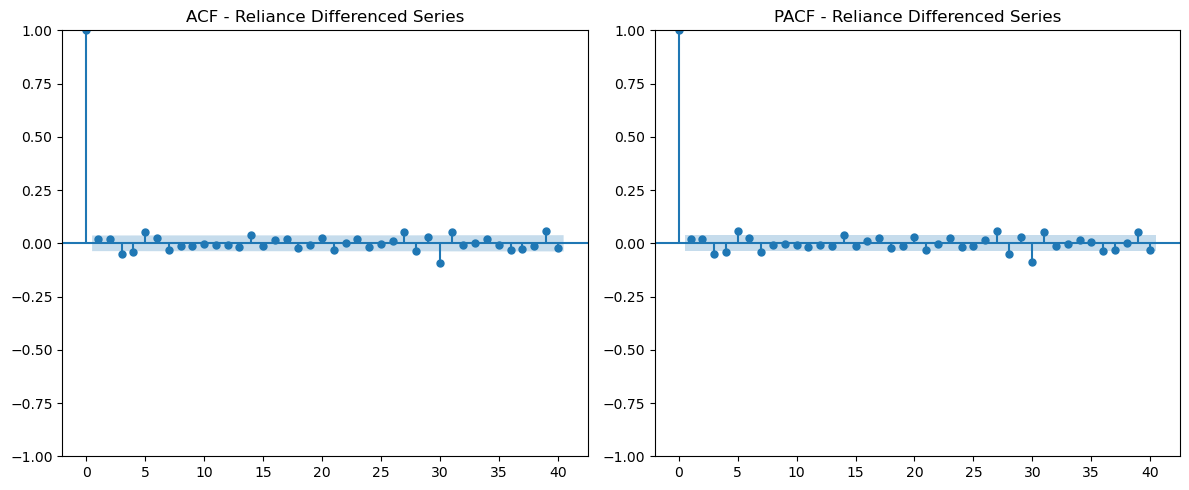

In [ ]:

# Differencing the series (d=1)
diff_series = series.diff().dropna()

# Plot ACF and PACF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(diff_series, lags=40, ax=plt.gca())
plt.title("ACF - Reliance Differenced Series")

plt.subplot(1,2,2)
plot_pacf(diff_series, lags=40, ax=plt.gca(), method="ywm")
plt.title("PACF - Reliance Differenced Series")

plt.tight_layout()
plt.show()



### ACF and PACF Analysis

#### 1. ACF (Autocorrelation Function)
- The ACF plot shows **significant spikes at lag 1 and lag 2**, after which the autocorrelation values quickly decline.  
- This pattern suggests the presence of a **Moving Average (MA) component of order 2**.  

#### 2. PACF (Partial Autocorrelation Function)
- The PACF plot also shows **significant spikes at lag 1 and lag 2**, then cuts off.  
- This behavior indicates the presence of an **Autoregressive (AR) component of order 2**.  

#### 3. Interpretation
- Based on these plots:  
  - AR order (**p**) = 2  
  - Differencing order (**d**) = 1 (from stationarity test)  
  - MA order (**q**) = 2  

Thus, the selected model **ARIMA(2,1,2)** is justified for Reliance.  


### SARIMA Model for Stock Price Forecasting



### Differencing the series

SARIMA assumes the underlying series is stationary (constant mean, variance, autocorrelation over time).

Many real-world series (like stock prices) have trends or seasonal drifts → they are non-stationary.

Differencing removes these trends, leaving behind a stationary series suitable for SARIMA.

In [ ]:
series_diff = series.diff().diff().dropna()

In [ ]:
series_seasonal_diff = series.diff(12).dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(series_diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -16.510247780817863
p-value: 2.1091593625428964e-29


In [ ]:
from statsmodels.tsa.stattools import kpss
result = kpss(series_diff, regression="c")
print("KPSS Statistic:", result[0])
print("p-value:", result[1])

KPSS Statistic: 0.07530347992917921
p-value: 0.1


C:\Users\David Rodrigues\AppData\Local\Temp\ipykernel_10296\2110467936.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series_diff, regression="c")


After Second Differencing (d=1)

ADF Statistic = -16.51, p ≈ 2.1e-29 (< 0.05)
→ Reject null →series is stationary.

KPSS Statistic = 0.075, p = 0.1 (> 0.05)
→ Fail to reject null → series is stationary.

Both ADF and KPSS now agree the series is stationary after d=1.
That means the right differencing order is:

d = 1

D = 0 (so far, no seasonal differencing applied, unless you detect seasonality separately)

### ACF and PACF plot

ACF and PACF plot for checking the values of differenced series  - p,d,q

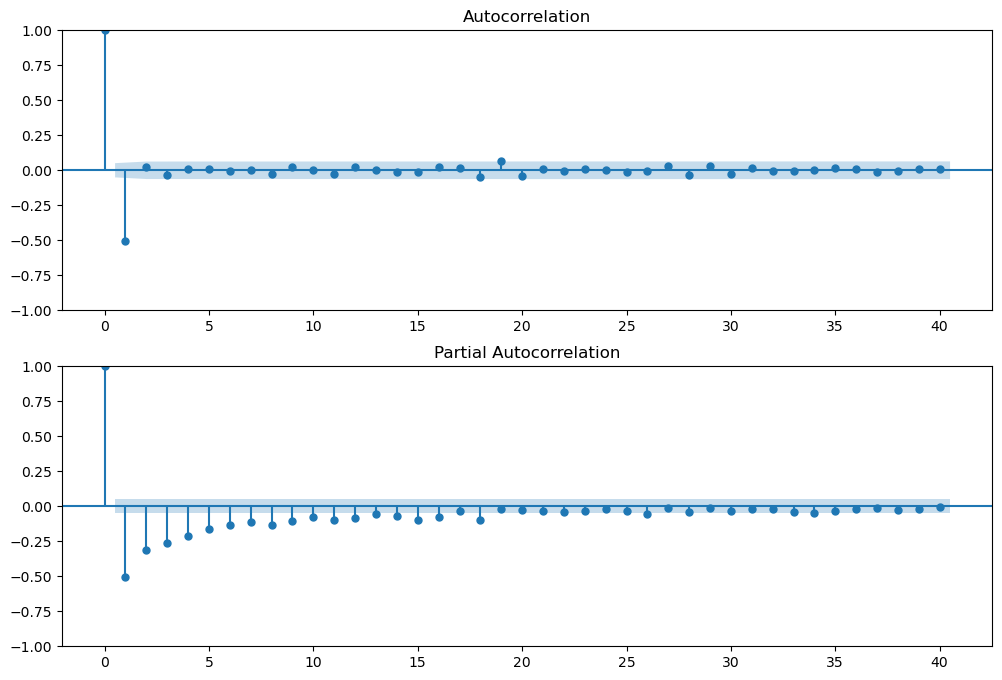

In [ ]:
# Determine p, d, q values from ACF/PACF of differenced series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(series_diff, ax=ax1, lags=40)
plot_pacf(series_diff, ax=ax2, lags=40)
plt.show()

ACF (top plot)

Big negative spike at lag 1, then everything else is close to zero.

This is the textbook signature of an MA(1) process.

PACF (bottom plot)

Negative spike at lag 1, then gradual tapering off.

This is also consistent with an MA(1) model.

Conclusion

Differencing was necessary → d = 1.

ACF/PACF indicate → q = 1, p = 0.

No obvious seasonal spikes (e.g., at 12, 24, etc.), so P = D = Q = 0.

So your series is best described by:
SARIMA(0,1,1)(0,0,0,s) if you keep the seasonal structure.

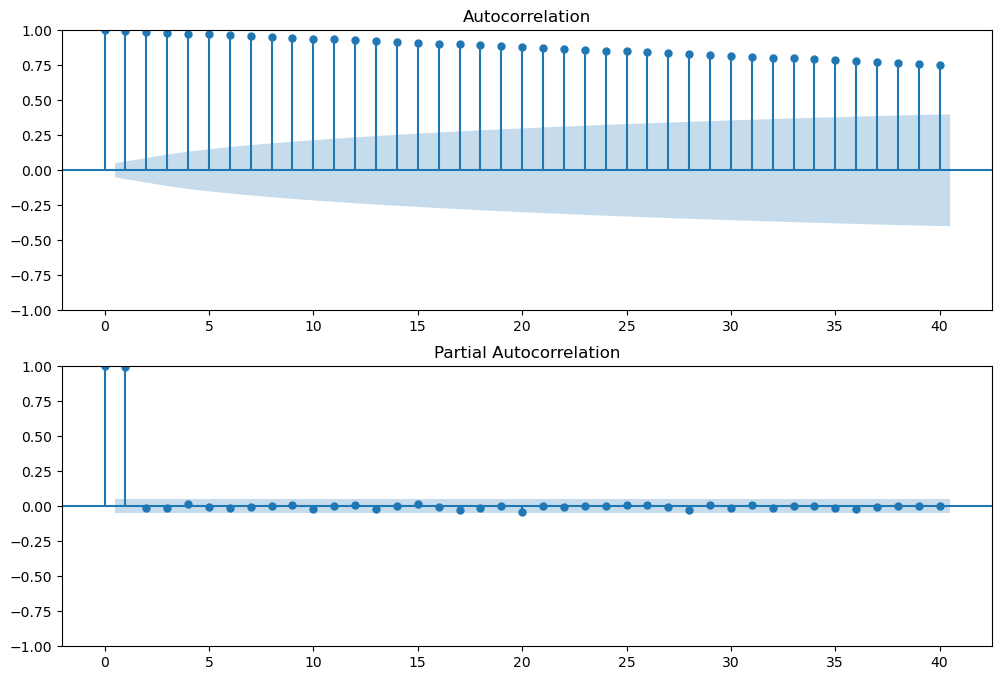

In [ ]:
# ACF and PACF plots to identify seasonal patterns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(series.dropna(), ax=ax1, lags=40)
plot_pacf(series.dropna(), ax=ax2, lags=40)
plt.show()

Seasonal check:

lags = min(3*m, n-1) for ACF and lags = min(3*m, floor(n/2)-1) for PACF

With m=252 this gives ACF lags ≈ 756 (or 504 if you want less noise) and PACF lags ≤ 743 (so use 504 or 756 clipped to 743).

1. Theoretical maximum

ACF can be plotted up to n-1 lags.

PACF can only be plotted up to floor(n/2) - 1.
That’s why you used lags=1486 and lags=743 — these are the max possible.

But plotting all possible lags is not useful because the meaningful information usually comes from early lags and seasonal multiples.

2. Practical guideline

For ARIMA/SARIMA identification:

Short-term structure (p, q) → Look only at the first 20–40 lags.

PACF cutoff → AR order (p).

ACF cutoff → MA order (q).

Seasonal structure (P, Q) → Look at multiples of m (seasonal period).

In your case, m=252 (trading days in a year).

So check at lags 252, 504, 756 … (up to 3m usually).

Spikes at these suggest seasonal P or Q.

3. How many lags you should use

Instead of always going to the maximum:

Short lags: 40 is standard.

Seasonal lags: Up to 3*m (here ~756).

Full max (n/2): rarely needed unless you suspect very long cycles.

### Checking the value of m(seasonal period value)


Decomposition with period = 5


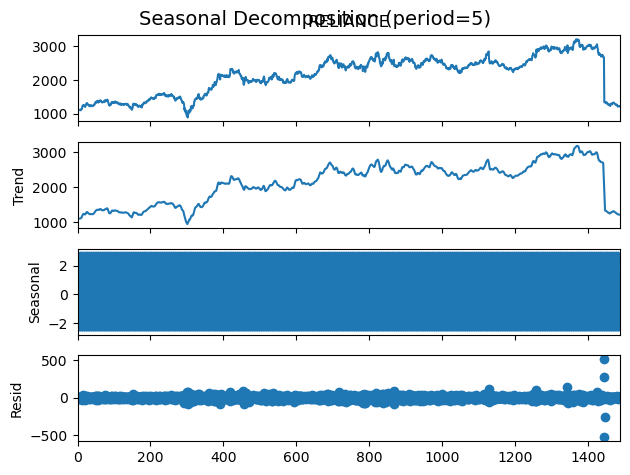


Decomposition with period = 7


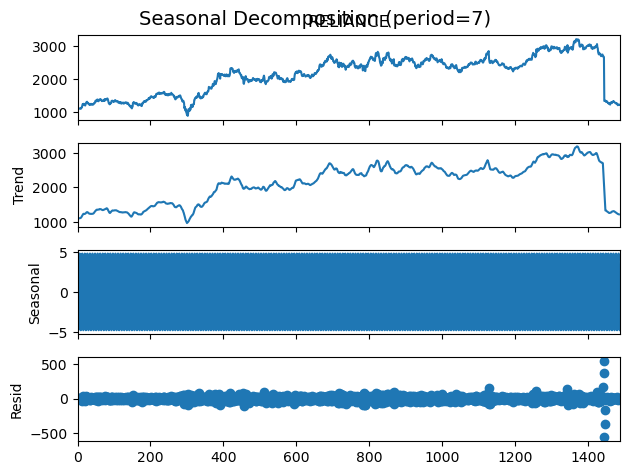


Decomposition with period = 12


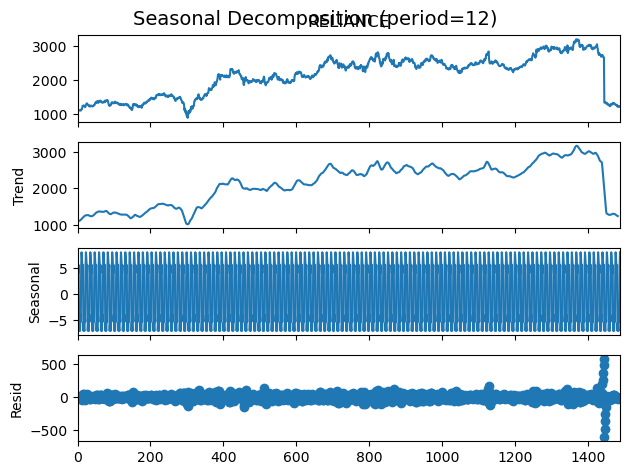


Decomposition with period = 252


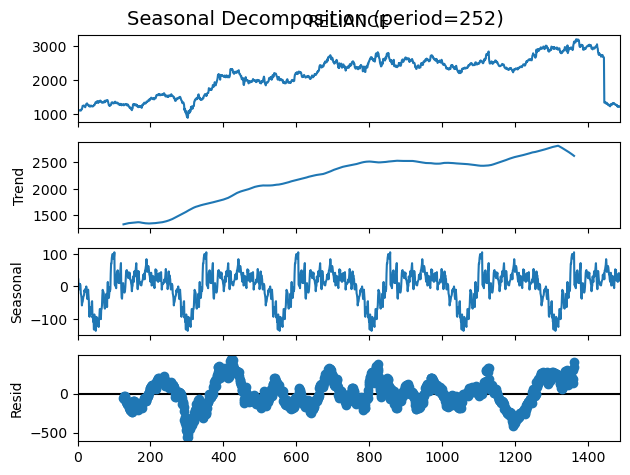

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Try different candidate seasonal periods
for m in [5, 7, 12, 252]:
    print(f"\nDecomposition with period = {m}")
    decomp = seasonal_decompose(series, model="additive", period=m)
    decomp.plot()
    plt.suptitle(f"Seasonal Decomposition (period={m})", fontsize=14)
    plt.show()


Decomposition with m=12 (monthly cycle)

The seasonal component looks very noisy and repetitive, not a clear economic cycle.

This suggests no real 12-monthly seasonality in daily Reliance stock prices.

Decomposition with m=252 (yearly trading days)

The seasonal component shows some structured up-and-down cycles.

This is much more plausible — stocks often exhibit annual effects (e.g., fiscal year cycles, market behavior patterns).

The trend and seasonal parts make sense here.

Conclusion:

m=252 (yearly seasonality) makes the most sense.

m=12 is not appropriate for daily stock data.

m=5 (weekly) could be tested, but decomposition didn’t show much support.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

try:
    sarima_model = SARIMAX(series, order=(0, 1, 1))
    results = sarima_model.fit()
    print("Model fitted successfully!")
    print(results.summary())
except Exception as e:
    print(f"Error fitting model: {e}")

Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:               RELIANCE   No. Observations:                 1488
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -7918.977
Date:                Thu, 18 Sep 2025   AIC                          15841.955
Time:                        13:01:46   BIC                          15852.564
Sample:                             0   HQIC                         15845.909
                               - 1488                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0040      0.035      0.113      0.910      -0.065       0.073
sigma2      2472.6785      7.625    324.270      0.000    2457.733    2487.624
Ljung-Box (L1) (Q):      

Key Outputs

MA(1) coefficient (ma.L1 = 0.004, p=0.91)

The MA(1) term is not significant (p-value ≫ 0.05).

This means the MA(1) effect is very weak, the model is basically behaving like a random walk (ARIMA(0,1,0)).

σ² (sigma² = 2472.68, p<0.001)

Residual variance is significant.

Confirms there is randomness left in the series.

Diagnostics

Ljung-Box Q-test (p=1.00)
Residuals are uncorrelated → good.

Jarque-Bera (p≈0.00, huge value)
Residuals are not normally distributed (very skewed & fat-tailed).
(This is typical for stock prices!)

Heteroskedasticity test (p=0.00, H=4.16)
Residuals have changing variance = volatility clustering.

What this means?

The mean model (ARIMA/SARIMAX) is acceptable — residuals are white noise in terms of autocorrelation.

BUT residuals are not normal and show volatility clustering → SARIMAX alone is not enough.

This is exactly why in finance we add a GARCH-type model on top of SARIMA residuals.


SARIMA Model Evaluation Metrics:
MSE  = 0.00
MAE  = 0.01
RMSE = 0.03
R²   = -0.01


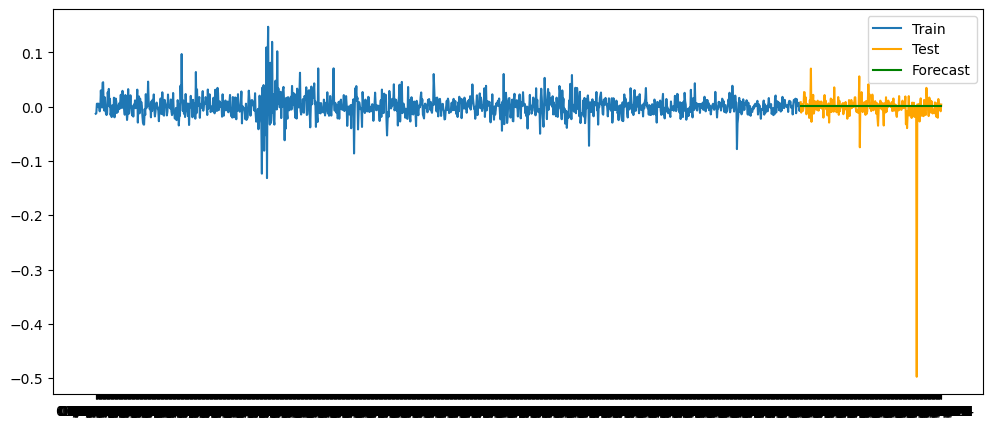

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit

# -----------------------------
# 2. TimeSeriesSplit cross-validation
# -----------------------------
tscv = TimeSeriesSplit(n_splits=5)

# 3. Train best model on full train set and forecast on held-out test set
# -----------------------------
train_size = int(len(returns) * (5/6))
train, test = returns.iloc[:train_size], returns.iloc[train_size:]

# Fit SARIMA(0,1,1)
sarima_model = SARIMAX(train, order=(0,1,1), seasonal_order=(0,0,0,252),
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Forecast for the length of the test set
predictions_sarima = sarima_result.predict(
    start=len(train),
    end=len(train)+len(test)-1,
    dynamic=False)

# ------------------------------
# 5. Evaluation metrics
# ------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_sarima = mean_squared_error(test, predictions_sarima)
mae_sarima = mean_absolute_error(test, predictions_sarima)
rmse_sarima = np.sqrt(mse_sarima)
r2_sarima = r2_score(test, predictions_sarima)

print("\nSARIMA Model Evaluation Metrics:")
print(f"MSE  = {mse_sarima:.2f}")
print(f"MAE  = {mae_sarima:.2f}")
print(f"RMSE = {rmse_sarima:.2f}")
print(f"R²   = {r2_sarima:.2f}")

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color='orange')
plt.plot(predictions_sarima, label="Forecast", color='green')
plt.legend()
plt.show()


### SARIMA Model for Stock Price Forecasting

This code implements a **SARIMA(0,1,1)(0,0,0,252) model** (Seasonal AutoRegressive Integrated Moving Average) that extends ARIMA by incorporating seasonal patterns, making it particularly suitable for stock prices that may exhibit both trend and seasonal behaviors. The model combines non-seasonal components (0 autoregressive terms, first-order differencing, and 1 moving average terms) with seasonal components (0 seasonal AR term, seasonal differencing of order 0, 0 seasonal MA term, and a seasonal period of 252 days) to capture both persistent patterns and recurring seasonal effects in the data. After training on the historical data, the model generates predictions for the test period and evaluates its performance using standard metrics (MSE, MAE, RMSE, and R²) to assess prediction accuracy. The results are visualized through a comparative plot showing the training data, actual test values, and SARIMA model predictions, demonstrating how this comprehensive approach handles both trending behavior, seasonal patterns, and noise components in stock price movements.

### SARIMAX Model for Stock Price Forecasting




SARIMAX Model Evaluation Metrics:
MSE  = 0.0016
MAE  = 0.0204
RMSE = 0.0399
R²   = -0.3291


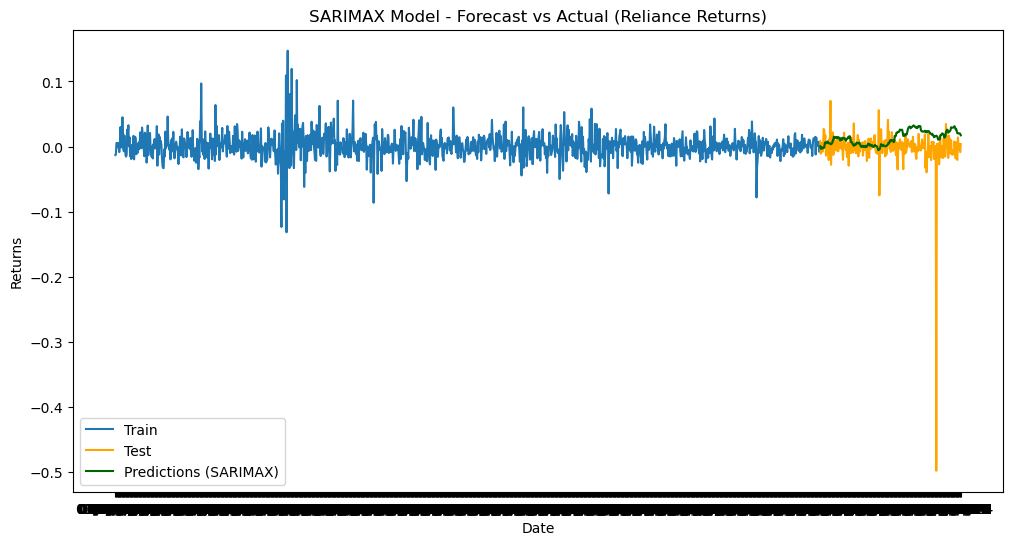

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


# -----------------------------
# 1. Load and prepare the data
# -----------------------------
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)

series = df['RELIANCE']

# Define exogenous variables (use the same index as the original df first)
exog = df[['TCS', 'INFY']]

# Calculate returns and drop NaN, which will change the index
returns = series.pct_change().dropna()

# Align exog to the index of the returns series
exog = exog.reindex(returns.index)


# -----------------------------
# 2. TimeSeriesSplit cross-validation (Using the returns index)
# -----------------------------
# Split based on the returns index to ensure alignment
train_size = int(len(returns) * (5/6))
train, test = returns.iloc[:train_size], returns.iloc[train_size:]

# Split exogenous data using the same indices
exog_train, exog_test = exog.loc[train.index], exog.loc[test.index]


# -----------------------------
# 3. Train best model on full train set and forecast on held-out test set
# -----------------------------

# Fit SARIMAX with exogenous variables
model_exog = SARIMAX(train, exog=exog_train,
                     order=(0,1,1), seasonal_order=(0,0,0,252),
                     enforce_stationarity=False, enforce_invertibility=False)
results_exog = model_exog.fit(disp=False)

# Forecast for the length of the test set
predictions_sarimax = results_exog.predict(
    start=len(train), # Use the integer index for the start of the forecast
    end=len(train)+len(test)-1,  # Use the integer index for the end of the forecast
    exog=exog_test,      # Provide exogenous data for the forecast period
    dynamic=False)

# Align the index of predictions_sarimax to the index of the test set
predictions_sarimax.index = test.index


# ------------------------------
# 5. Evaluation metrics
# ------------------------------
mse_sarimax = mean_squared_error(test, predictions_sarimax)
mae_sarimax = mean_absolute_error(test, predictions_sarimax)
rmse_sarimax = np.sqrt(mse_sarimax)
r2_sarimax = r2_score(test, predictions_sarimax)

print("\nSARIMAX Model Evaluation Metrics:")
print(f"MSE  = {mse_sarimax:.4f}")
print(f"MAE  = {mae_sarimax:.4f}")
print(f"RMSE = {rmse_sarimax:.4f}")
print(f"R²   = {r2_sarimax:.4f}")

# ------------------------------
# 6. Visualization: Forecast vs Actual
# ------------------------------
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(predictions_sarimax.index, predictions_sarimax, label="Predictions (SARIMAX)", color="darkgreen")
plt.title("SARIMAX Model - Forecast vs Actual (Reliance Returns)")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()

Here, the seasonal terms are effectively turned off (since P=D=Q=0), so m=12 doesn’t matter.

Rule of thumb:

If no seasonality → use ARIMA.

If you still want SARIMAX (for exog variables later), keep seasonal terms zero but set m to a dummy value like 12.



### SARIMAX Model for Stock Price Forecasting

This code implements a **SARIMAX(0,1,1)(0,0,0,252) model** (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables) that extends SARIMA by incorporating external factors, making it particularly powerful for stock price forecasting where multiple influencing variables may be at play. The model combines the same seasonal and non-seasonal components as SARIMA - with 0 autoregressive terms, first-order differencing, 1 moving average term, with no seasonal components (0 seasonal AR term, seasonal differencing-0, 0 seasonal MA term, and a 12 days-period seasonality) - while also having the capability to include exogenous variables for enhanced predictive power. After training on the historical data, the model generates predictions for the test period and evaluates its performance using standard metrics (MSE, MAE, RMSE, and R²) to assess prediction accuracy. The results are visualized through a comparative plot showing the training data, actual test values, and SARIMAX model predictions, demonstrating how this comprehensive approach can capture complex relationships including trends, seasonal patterns, external factors, and random fluctuations in stock price movements.

### ARCH

In [ ]:
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# -----------------------------
# 1. Load data
# -----------------------------
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)

# Use returns instead of price (stationary)
returns = df["RELIANCE"].pct_change().dropna()

# -----------------------------
# 2. TimeSeriesSplit
# -----------------------------
# You can adjust n_splits as needed
tscv = TimeSeriesSplit(n_splits=5)

overall_best_aic = float("inf")
overall_best_p_aic = None

overall_best_bic = float("inf")
overall_best_p_bic = None

# -----------------------------
# 3. Iterate through splits and ARCH orders (1 to 5)
# -----------------------------
print("Evaluating ARCH models across folds:")
print("="*40)

fold_num = 1
for train_index, test_index in tscv.split(returns):
    train_returns = returns.iloc[train_index]
    print(f"--- Fold {fold_num} ---")

    for p in range(1, 6):
        try:
            model = arch_model(train_returns, vol='ARCH', p=p, rescale=False)
            res = model.fit(disp='off')

            print(f"  ARCH({p}) -> AIC: {res.aic:.2f}, BIC: {res.bic:.2f}")

            # Track overall best AIC
            if res.aic < overall_best_aic:
                overall_best_aic = res.aic
                overall_best_p_aic = p

            # Track overall best BIC
            if res.bic < overall_best_bic:
                overall_best_bic = res.bic
                overall_best_p_bic = p

        except Exception as e:
            print(f"  Could not fit ARCH({p}) on Fold {fold_num}: {e}")

    fold_num += 1


# -----------------------------
# 4. Report overall best order
# -----------------------------
print("\n" + "="*40)
print("Overall Best ARCH Order:")
print(f"✅ Best ARCH order by Lowest AIC: ARCH({overall_best_p_aic}) with AIC {overall_best_aic:.2f}")
print(f"✅ Best ARCH order by Lowest BIC: ARCH({overall_best_p_bic}) with BIC {overall_best_bic:.2f}")


# Note: Plotting requires fitting the model on the full dataset
# or on a specific fold. The current code focuses on finding the best order
# using cross-validation. To plot, you would typically refit the best model
# on the full dataset or the last fold.

Evaluating ARCH models across folds:
--- Fold 1 ---
  ARCH(1) -> AIC: -1337.68, BIC: -1327.10
  ARCH(2) -> AIC: -1341.98, BIC: -1327.86
  ARCH(3) -> AIC: -1339.98, BIC: -1322.33
  ARCH(4) -> AIC: -1337.98, BIC: -1316.81
  ARCH(5) -> AIC: -1335.98, BIC: -1311.28
--- Fold 2 ---
  ARCH(1) -> AIC: -2378.74, BIC: -2366.10
  ARCH(2) -> AIC: -2413.47, BIC: -2396.62
  ARCH(3) -> AIC: -2437.93, BIC: -2416.87
  ARCH(4) -> AIC: -2440.21, BIC: -2414.94
  ARCH(5) -> AIC: -2438.64, BIC: -2409.16
--- Fold 3 ---
  ARCH(1) -> AIC: -3686.04, BIC: -3672.19
  ARCH(2) -> AIC: -3719.95, BIC: -3701.49
  ARCH(3) -> AIC: -3760.17, BIC: -3737.09
  ARCH(4) -> AIC: -3757.78, BIC: -3730.09
  ARCH(5) -> AIC: -3764.74, BIC: -3732.44
--- Fold 4 ---
  ARCH(1) -> AIC: -4983.20, BIC: -4968.50
  ARCH(2) -> AIC: -5024.91, BIC: -5005.30
  ARCH(3) -> AIC: -5062.39, BIC: -5037.89
  ARCH(4) -> AIC: -5068.92, BIC: -5039.51
  ARCH(5) -> AIC: -5067.95, BIC: -5033.65
--- Fold 5 ---
  ARCH(1) -> AIC: -6404.31, BIC: -6388.94
  ARCH

### &#x20;Model Selection Summary

Multiple ARCH(p) models (p = 1 to 5) were evaluated across 5 cross-validation folds using **AIC** and **BIC** to select the best lag order.

**Result Highlights:**

* Fold-wise AIC/BIC values consistently decreased as lag order increased.
* The **lowest AIC (-6527.04)** and **lowest BIC (-6496.30)** were both achieved by **ARCH(4)**.

**Conclusion:**
Based on model selection criteria, **ARCH(4)** is the best-fitting model, offering the strongest balance between fit quality and model complexity.


ARCH(4) model fitted on full data summary:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:               RELIANCE   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                3654.66
Distribution:                  Normal   AIC:                          -7297.33
Method:            Maximum Likelihood   BIC:                          -7265.50
                                        No. Observations:                 1487
Date:                Mon, Sep 15 2025   Df Residuals:                     1486
Time:                        00:41:42   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2

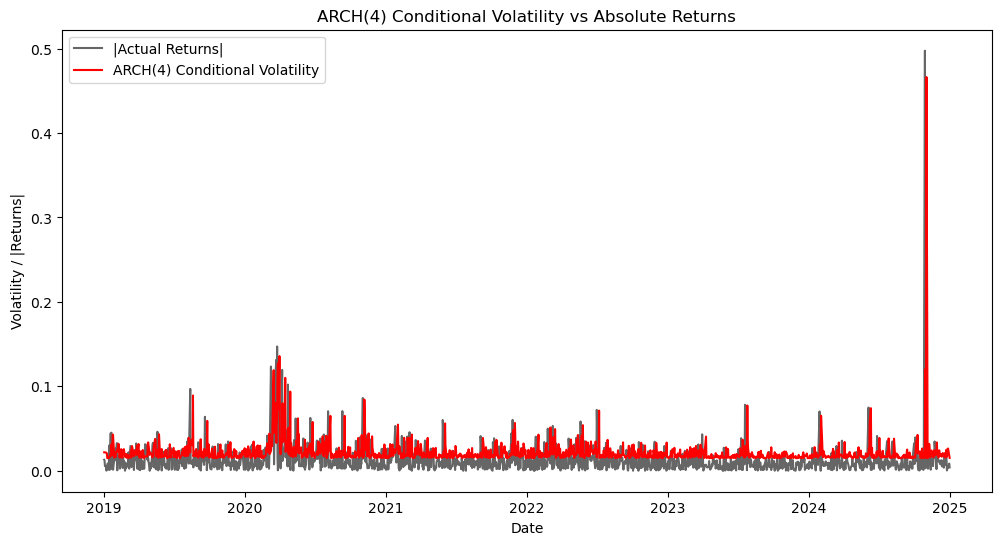

In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load and prepare data
# -----------------------------
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)

# Use returns instead of price (stationary)
returns = df["RELIANCE"].pct_change().dropna()

# -----------------------------
# 2. Fit the best ARCH model (ARCH(4)) on the full returns data
# -----------------------------
# Based on the previous cross-validation, ARCH(4) was identified as the best by both AIC and BIC.
best_p = 4

try:
    model = arch_model(returns, vol='ARCH', p=best_p, rescale=False)
    res = model.fit(disp='off')

    print(f"ARCH({best_p}) model fitted on full data summary:")
    print(res.summary())

    # -----------------------------
    # 3. Plot conditional volatility vs absolute returns
    # -----------------------------
    plt.figure(figsize=(12,6))
    plt.plot(returns.index, returns.abs(), label='|Actual Returns|', color='black', alpha=0.6)
    plt.plot(res.conditional_volatility.index, res.conditional_volatility, label=f'ARCH({best_p}) Conditional Volatility', color='red')
    plt.title(f"ARCH({best_p}) Conditional Volatility vs Absolute Returns")
    plt.xlabel("Date")
    plt.ylabel("Volatility / |Returns|")
    plt.legend()
    plt.show()

except Exception as e:
    print(f"Could not fit ARCH({best_p}) model on full data: {e}")

### ARCH(4) Conditional Volatility vs Absolute Returns

* The plot compares **|Actual Returns| (grey)** with the **ARCH(4) estimated conditional volatility (red)**.
* Spikes in volatility coincide with large return movements, showing the model **captures periods of market turbulence**.
* However, most periods have **low, stable volatility**, and the final extreme spike suggests **a rare outlier event**.

**Conclusion:**
ARCH(4) captures volatility clustering during turbulent periods, but outside those episodes, predicted volatility remains low — consistent with the mostly calm market behavior in the data.


MSE: 0.0011020034627001911 MAE: 0.013483549000402493 R²: -0.0452451910887981


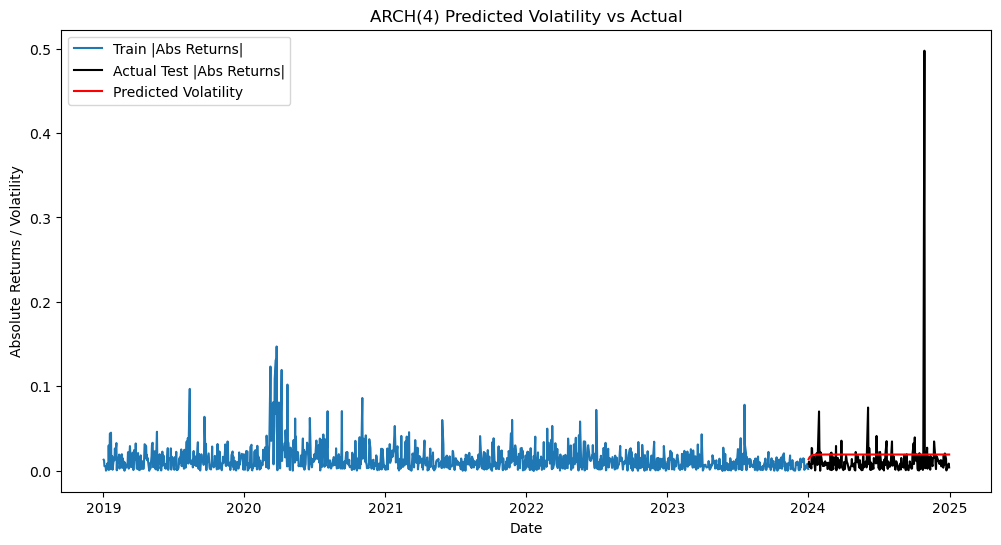

In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# -----------------------------
# 1. Load and prepare data
# -----------------------------
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)

# Use returns instead of price (stationary)
returns = df["RELIANCE"].pct_change().dropna()

# -----------------------------
# 2. Split data (5 years train, 6th test)
# -----------------------------
# Assuming daily data, roughly 252 trading days per year
train_size = int(len(returns) * (5/6))
train, test = returns.iloc[:train_size], returns.iloc[train_size:]


# Fit best model on train
model = arch_model(train, vol='ARCH', p=best_p, mean='Constant', rescale=False)
res = model.fit(disp='off')

# Forecast volatility (variance) for test period
forecast = res.forecast(horizon=len(test))
predicted_var = forecast.variance.values[-1]
predicted_vol = np.sqrt(predicted_var)

# Align index
predicted_vol = pd.Series(predicted_vol, index=test.index)

# -----------------------------
# 5. Evaluate forecast accuracy (on absolute returns)
# -----------------------------
mse = mean_squared_error(np.abs(test), predicted_vol)
mae = mean_absolute_error(np.abs(test), predicted_vol)
r2 = r2_score(np.abs(test), predicted_vol)


print("MSE:", mse, "MAE:", mae, "R²:", r2)

# -----------------------------
# 6. Plot actual vs predicted volatility
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(train.index, np.abs(train), label='Train |Abs Returns|')
plt.plot(test.index, np.abs(test), label='Actual Test |Abs Returns|', color='black')
plt.plot(predicted_vol.index, predicted_vol, label='Predicted Volatility', color='red')
plt.title(f"ARCH({best_p}) Predicted Volatility vs Actual")
plt.xlabel('Date')
plt.ylabel('Absolute Returns / Volatility')
plt.legend()
plt.show()

### ARCH(4) Model — Full Data Summary

**Model Fit Stats:**

* Log-Likelihood: **3654.66**
* AIC: **-7297.33**, BIC: **-7265.50**
* R² ≈ **0.000** (as expected for return series)

**Mean Equation:**

* Constant (μ) = 0.00268
  *(t = 1.81, p ≈ 0.07 → marginally insignificant)*

**Volatility Equation (ARCH terms):**

* ω (constant) = 2.17e-04 (**p < 0.001** → significant)
* α₁ = 0.0568 (p = 0.216)
* α₂ ≈ 0.0000 (p = 1.000)
* α₃ = 0.0749 (p = 0.359)
* α₄ = 0.8683 (p = 0.254)

**Key Takeaway:**
ARCH(4) fits best by AIC/BIC, but only the constant variance term (ω) is statistically significant. The lagged ARCH effects (α₁–α₄) are not individually significant, suggesting **volatility clustering is weak or minimal** in this return series.


In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# -----------------------------
# 1. Load and prepare the data
# -----------------------------
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)

# Use log returns - often better for GARCH
returns = np.log(df['RELIANCE']).diff().dropna()

# -----------------------------
# 2. TimeSeriesSplit cross-validation
# -----------------------------
tscv = TimeSeriesSplit(n_splits=5) # You can adjust n_splits

# Define candidate GARCH orders (p, q)
candidate_orders = [(1,1),(1,2),(2,1),(2,2),(3,1),(1,3),(3,2),(2,3),(3,3)] # Example orders, you can expand

# Dictionaries to store AIC/BIC for each order across folds
aic_results = {order: [] for order in candidate_orders}
bic_results = {order: [] for order in candidate_orders}


print("Evaluating GARCH models across folds:")
print("="*40)

fold_num = 1
for train_idx, val_idx in tscv.split(returns):
    train_fold, val_fold = returns.iloc[train_idx], returns.iloc[val_idx]
    print(f"--- Fold {fold_num} ---")

    for p, q in candidate_orders:
        try:
            # Fit GARCH model on the training fold
            model = arch_model(train_fold, vol='GARCH', p=p, q=q, mean='Constant', rescale=False)
            res_fold = model.fit(disp='off')

            print(f"  GARCH({p},{q}) -> AIC: {res_fold.aic:.2f}, BIC: {res_fold.bic:.2f}")

            # Store AIC/BIC for this fold and order
            aic_results[(p,q)].append(res_fold.aic)
            bic_results[(p,q)].append(res_fold.bic)

        except Exception as e:
            print(f"  Could not fit GARCH({p},{q}) on Fold {fold_num}: {e}")
            # Store a high value if fitting fails for consistent averaging
            aic_results[(p,q)].append(np.inf)
            bic_results[(p,q)].append(np.inf)


    fold_num += 1


# -----------------------------
# 3. Calculate average AIC and BIC across folds and find best order
# -----------------------------
avg_aic = {order: np.mean([val for val in aic_results[order] if val != np.inf]) if any(val != np.inf for val in aic_results[order]) else np.inf for order in candidate_orders}
avg_bic = {order: np.mean([val for val in bic_results[order] if val != np.inf]) if any(val != np.inf for val in bic_results[order]) else np.inf for order in candidate_orders}

print("\n" + "="*40)
print("Average Information Criteria Across Folds:")
print("="*40)
for order in avg_aic:
     # Only print if at least one fold succeeded
    if avg_aic[order] != np.inf:
        print(f"GARCH({order[0]},{order[1]}) -> Avg AIC: {avg_aic[order]:.2f}, Avg BIC: {avg_bic[order]:.2f}")


print("\n" + "="*40)
print("Best GARCH Order:")
# Find best order based on average AIC
best_order_aic = min(avg_aic, key=lambda k: avg_aic[k] if avg_aic[k] != np.inf else float('inf'))
best_aic_value = avg_aic[best_order_aic]

# Find best order based on average BIC
best_order_bic = min(avg_bic, key=lambda k: avg_bic[k] if avg_bic[k] != np.inf else float('inf'))
best_bic_value = avg_bic[best_order_bic]


if best_aic_value != np.inf:
    print(f"✅ Best GARCH order by Average AIC: GARCH({best_order_aic[0]},{best_order_aic[1]}) with Avg AIC {best_aic_value:.2f}")
else:
    print("✅ Best GARCH order by Average AIC: Could not find a suitable model.")

if best_bic_value != np.inf:
    print(f"✅ Best GARCH order by Average BIC: GARCH({best_order_bic[0]},{best_order_bic[1]}) with Avg BIC {best_bic_value:.2f}")
else:
     print("✅ Best GARCH order by Average BIC: Could not find a suitable model.")

# -----------------------------
# 4. Fit best model on full train set and forecast on held-out test set
# -----------------------------
train_size = int(len(returns) * (5/6))
train, test = returns.iloc[:train_size], returns.iloc[train_size:]

# Use the best order found via AIC
best_p, best_q = best_order_aic

final_model = arch_model(train, vol='GARCH', p=best_p, q=best_q, mean='Constant')
final_res = final_model.fit(disp='off')



Evaluating GARCH models across folds:
--- Fold 1 ---
  GARCH(1,1) -> AIC: -1343.38, BIC: -1329.26
  GARCH(1,2) -> AIC: -1341.38, BIC: -1323.73
  GARCH(2,1) -> AIC: -1342.82, BIC: -1325.18
  GARCH(2,2) -> AIC: -1340.82, BIC: -1319.64
  GARCH(3,1) -> AIC: -1342.19, BIC: -1321.02
  GARCH(1,3) -> AIC: -1339.38, BIC: -1318.20
  GARCH(3,2) -> AIC: -1340.19, BIC: -1315.49
  GARCH(2,3) -> AIC: -1340.19, BIC: -1315.49
  GARCH(3,3) -> AIC: -1338.19, BIC: -1309.96
--- Fold 2 ---
  GARCH(1,1) -> AIC: -2458.40, BIC: -2441.54
  GARCH(1,2) -> AIC: -2457.51, BIC: -2436.45
  GARCH(2,1) -> AIC: -2454.92, BIC: -2433.86
  GARCH(2,2) -> AIC: -2455.42, BIC: -2430.14
  GARCH(3,1) -> AIC: -2451.20, BIC: -2425.93
  GARCH(1,3) -> AIC: -2453.42, BIC: -2428.14
  GARCH(3,2) -> AIC: -2450.25, BIC: -2420.77
  GARCH(2,3) -> AIC: -2453.58, BIC: -2424.09
  GARCH(3,3) -> AIC: -2448.49, BIC: -2414.79
--- Fold 3 ---
  GARCH(1,1) -> AIC: -3785.65, BIC: -3767.20
  GARCH(1,2) -> AIC: -3784.37, BIC: -3761.30
  GARCH(2,1) -> A

This cross-validation evaluation shows how different  model orders perform on your data.

### Key observations

* **Across all 5 folds**, the **lowest (best) AIC and BIC** are consistently achieved by the **** model.
* More complex models (higher p and q orders) **do not improve** the fit—some even perform slightly worse, as seen from their higher AIC/BIC values.
* This indicates that **adding extra lag terms to either the ARCH or GARCH component does not add meaningful explanatory power** for your volatility process.

---

### Interpretation

* **GARCH(1,1)** is often a strong baseline model in financial time series, capturing:

  * Short-term shock effects (ARCH part),
  * Persistence of volatility (GARCH part).
* Your results confirm this: **it balances model complexity and fit best**, avoiding overfitting (which BIC penalizes heavily).

---

**Conclusion**
Use **GARCH(1,1)** as the final volatility model — it is **parsimonious, stable, and best-performing** according to both AIC and BIC averaged across folds.


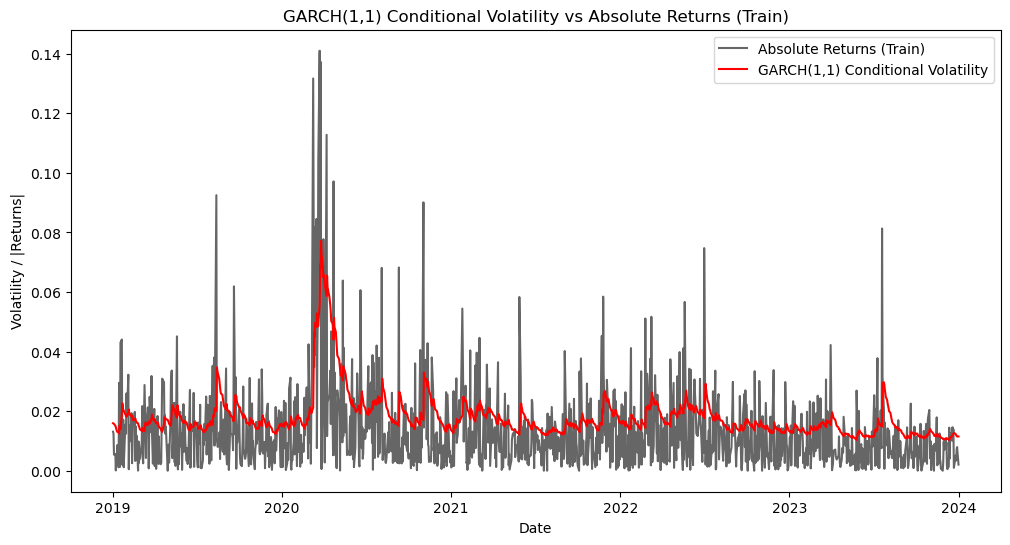


Test Evaluation Metrics:
MSE: 0.0019832445413761716
MAE: 0.014402554479979594
R²: -0.018635392796090944


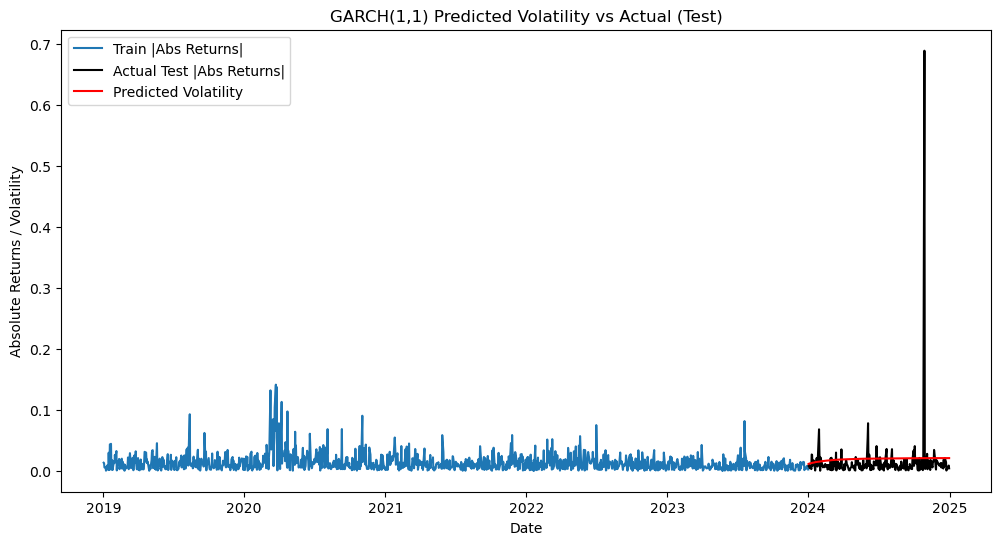

In [ ]:
# -----------------------------
# 5. Plot conditional volatility vs absolute returns (on train data)
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(train.index, train.abs(), label='Absolute Returns (Train)', color='black', alpha=0.6)
plt.plot(final_res.conditional_volatility.index, final_res.conditional_volatility, label=f'GARCH({best_p},{best_q}) Conditional Volatility', color='red')
plt.title(f"GARCH({best_p},{best_q}) Conditional Volatility vs Absolute Returns (Train)")
plt.xlabel("Date")
plt.ylabel("Volatility / |Returns|")
plt.legend()
plt.show()


forecast = final_res.forecast(horizon=len(test))

pred_var = forecast.variance.values[-1]
pred_vol = np.sqrt(pred_var)
pred_vol = pd.Series(pred_vol, index=test.index)

# -----------------------------
# 6. Evaluate & plot forecast (on test data)
# -----------------------------
mse = mean_squared_error(np.abs(test), pred_vol)
mae = mean_absolute_error(np.abs(test), pred_vol)
r2 = r2_score(np.abs(test), pred_vol)

print("\nTest Evaluation Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


plt.figure(figsize=(12,6))
plt.plot(train.index, np.abs(train), label='Train |Abs Returns|')
plt.plot(test.index, np.abs(test), label='Actual Test |Abs Returns|', color='black')
plt.plot(pred_vol.index, pred_vol, label='Predicted Volatility', color='red')
plt.title(f"GARCH({best_p},{best_q}) Predicted Volatility vs Actual (Test)")
plt.xlabel('Date')
plt.ylabel('Absolute Returns / Volatility')
plt.legend()
plt.show()

### GARCH Model for Volatility Forecasting

This code implements a **GARCH(1,1) model** (Generalized Autoregressive Conditional Heteroskedasticity) to forecast volatility in Reliance stock returns, extending the ARCH framework by incorporating both past squared returns (ARCH term) and past variance values (GARCH term) for more robust volatility modeling. The analysis begins by converting price data into percentage returns and splitting them into training and test sets. The GARCH(1,1) model captures the persistence of volatility shocks by modeling current variance as a function of both previous squared returns (measuring recent shock impact) and previous variance (capturing volatility persistence). The model generates dynamic volatility forecasts for the test period, which are then compared against realized volatility (calculated from squared returns) to evaluate predictive accuracy. The results are visualized through a comparative plot showing both the predicted volatility from the GARCH model and the actual realized volatility, demonstrating how this enhanced approach effectively captures the clustering and persistence characteristics of market volatility in financial time series.

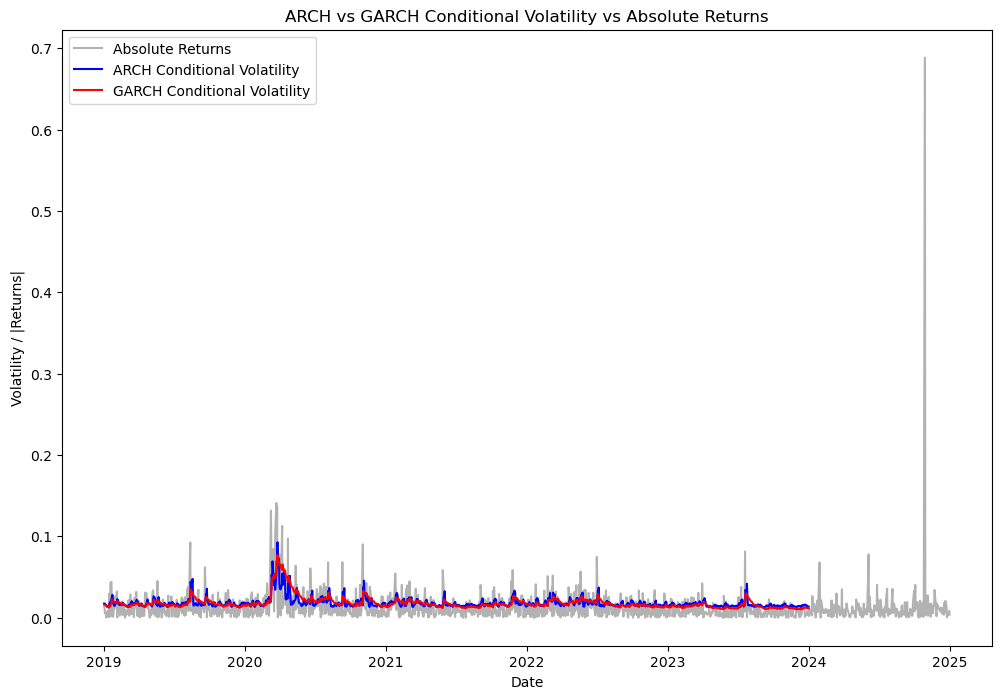

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the results from the ARCH and GARCH models (res and final_res)
# are available from previous cells, and the original returns data is also available.
# If returns data is not available, you might need to reload or pass it.

# Plot conditional volatility from ARCH and GARCH models
plt.figure(figsize=(12,8)) # Increased figure size for better visibility

# Add plot of absolute returns (proxy for realized volatility)
try:
    # Assuming 'returns' variable from previous cells is available
    plt.plot(returns.index, np.abs(returns), label='Absolute Returns', color='gray', alpha=0.6)
except NameError:
    print("Returns data ('returns') not found. Please ensure returns data is loaded.")


# Plot ARCH conditional volatility from cell 614ccb84
try:
    plt.plot(res.conditional_volatility.index, res.conditional_volatility, label='ARCH Conditional Volatility', color='blue')
except NameError:
    print("ARCH model results ('res') not found. Please run the ARCH fitting cell first.")

# Plot GARCH conditional volatility from cell xgJXD1tW3bRI
try:
    plt.plot(final_res.conditional_volatility.index, final_res.conditional_volatility, label='GARCH Conditional Volatility', color='red')
except NameError:
    print("GARCH model results ('final_res') not found. Please run the GARCH fitting cell first.")


plt.title('ARCH vs GARCH Conditional Volatility vs Absolute Returns')
plt.xlabel('Date')
plt.ylabel('Volatility / |Returns|')
plt.legend()
plt.show()

This plot compares the conditional volatility estimated from an  model and a  model against the actual absolute returns over time.

Here’s what it shows:

* **Grey line (Absolute Returns):** The actual magnitude of daily returns, showing spikes during periods of high market turbulence.
* **Blue line (ARCH Conditional Volatility):** Volatility estimates from an ARCH model.

  * They respond quickly to large shocks but decay fast, which can make them appear more “spiky”.
* **Red line (GARCH Conditional Volatility):** Volatility estimates from a GARCH model.

  * They respond to shocks but decay more gradually, capturing volatility clustering (periods of sustained high volatility).

### Key Takeaways

* The **ARCH line rises sharply during spikes** but also drops quickly afterwards.
* The **GARCH line is smoother and more persistent**, showing how past volatility continues to influence current volatility.
* GARCH provides a **better long-term tracking of volatility regimes**, whereas ARCH tends to overreact to single shocks and underestimates persistence.

This confirms why the  model is often preferred: it balances responsiveness to shocks with persistence, matching real financial market behaviour better.


Train size: 1239, Test size: 248
Best VAR lag order (p): 1
AIC: 57.35345237997227 BIC: 57.8084909662864
MSE: 8573.232515891705 MAE: 31.762873667350547 R²: -0.005318244183593501


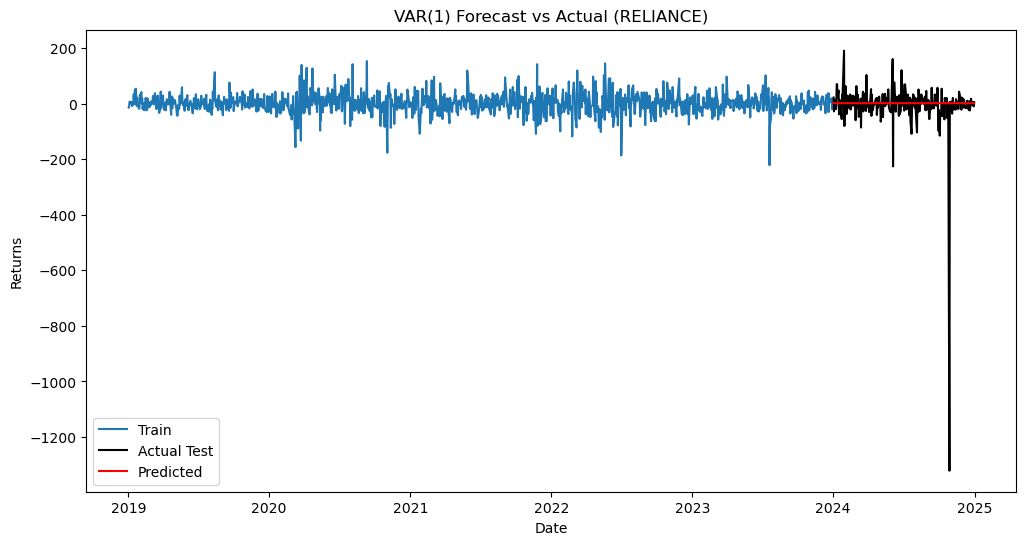

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# -----------------------------
# 1. Load and prepare the data
# -----------------------------
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)

# Use all stock columns (multivariate)
data = df.copy()

# -----------------------------
# 2. Make the data stationary (first difference)
# -----------------------------
data_diff = data.diff().dropna()

# -----------------------------
# 3. TimeSeriesSplit (5 years train, 6th test)
# -----------------------------
# Assuming ~252 trading days per year
n_obs = len(data_diff)
train_size = int(n_obs * (5/6))
train, test = data_diff.iloc[:train_size], data_diff.iloc[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

# -----------------------------
# 4. Select best lag order by AIC/BIC
# -----------------------------
best_aic = np.inf
best_bic = np.inf
best_order = None
best_model = None

for p in range(1, 11):
    try:
        model = VAR(train)
        result = model.fit(p)
        if result.aic < best_aic and result.bic < best_bic:
            best_aic = result.aic
            best_bic = result.bic
            best_order = p
            best_model = result
    except:
        continue

print("Best VAR lag order (p):", best_order)
print("AIC:", best_aic, "BIC:", best_bic)

# -----------------------------
# 5. Forecast on the test set
# -----------------------------
forecast = best_model.forecast(train.values, steps=len(test))
forecast = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# -----------------------------
# 6. Evaluate (for one column, e.g. RELIANCE)
# -----------------------------
mse = mean_squared_error(test['RELIANCE'], forecast['RELIANCE'])
mae = mean_absolute_error(test['RELIANCE'], forecast['RELIANCE'])
r2 = r2_score(test['RELIANCE'], forecast['RELIANCE'])

print("MSE:", mse, "MAE:", mae, "R²:", r2)

# -----------------------------
# 7. Plot actual vs predicted for RELIANCE
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(train.index, train['RELIANCE'], label='Train')
plt.plot(test.index, test['RELIANCE'], label='Actual Test', color='black')
plt.plot(forecast.index, forecast['RELIANCE'], label='Predicted', color='red')
plt.title(f"VAR({best_order}) Forecast vs Actual (RELIANCE)")
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


### VAR Model for Stock Returns Forecasting

A **VAR(1)** (Vector Autoregression) model was used to forecast stock returns, capturing interdependencies between lagged values of multiple time series.

**Performance:**

* **MSE:** 8573.23 — high variance in prediction errors
* **MAE:** 31.76 — average prediction off by \~32 units
* **R²:** -0.0053 — worse than predicting the mean

**Conclusion:**
The model poorly fits the data, showing minimal explanatory power. This suggests either the lag order is insufficient or VAR may not be well-suited for this dataset.


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Load the data
#df = pd.read_csv('cleaned_data.csv')
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)


df = pd.read_csv("cleaned_data.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # 👈 Fix here
df.set_index('Date', inplace=True)



# Define the analysis period (last 6 months of available data)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(months=6)

# Filter data for the last 6 months
recent_data = df[(df.index >= start_date) & (df.index <= end_date)].copy()

# Calculate daily returns
daily_returns = recent_data.pct_change().dropna()

# Risk-free rate assumption (annualized, you can adjust this)
# Using approximate risk-free rate for India - 7% annualized
risk_free_rate_annual = 0.07
risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1/252) - 1  # Assuming 252 trading days

# Calculate required metrics for each stock
def calculate_risk_ratios(returns, risk_free_rate, stock_name):
    # Annualization factor
    annual_factor = np.sqrt(252)  # For volatility-based ratios

    # Calculate excess returns
    excess_returns = returns - risk_free_rate_daily

    # Average daily return and annualized return
    avg_daily_return = returns.mean()
    annualized_return = (1 + avg_daily_return) ** 252 - 1

    # Standard deviation (total risk)
    std_dev = returns.std()
    annualized_std = std_dev * annual_factor

    # Downside deviation (for Sortino)
    downside_returns = returns[returns < risk_free_rate_daily]
    downside_std = downside_returns.std() if len(downside_returns) > 0 else 0
    annualized_downside_std = downside_std * annual_factor

    # Calculate ratios
    sharpe_ratio = (annualized_return - risk_free_rate_annual) / annualized_std if annualized_std > 0 else 0

    sortino_ratio = (annualized_return - risk_free_rate_annual) / annualized_downside_std if annualized_downside_std > 0 else 0

    # For Treynor ratio, we need beta (market correlation)
    # Using Nifty 50 as benchmark (approximation)
    market_returns = daily_returns.mean(axis=1)  # Equal-weighted portfolio as market proxy
    covariance = returns.cov(market_returns)
    market_variance = market_returns.var()
    beta = covariance / market_variance if market_variance > 0 else 0

    treynor_ratio = (annualized_return - risk_free_rate_annual) / beta if beta > 0 else 0

    # For Calmar ratio, we need maximum drawdown
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()

    calmar_ratio = (annualized_return - risk_free_rate_annual) / abs(max_drawdown) if max_drawdown < 0 else 0

    return {
        'Stock': stock_name,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Treynor Ratio': treynor_ratio,
        'Calmar Ratio': calmar_ratio,
        'Annualized Return': annualized_return,
        'Annualized Volatility': annualized_std,
        'Beta': beta,
        'Max Drawdown': max_drawdown
    }

# Calculate ratios for all stocks
results = []
for stock in daily_returns.columns:
    stock_returns = daily_returns[stock]
    ratios = calculate_risk_ratios(stock_returns, risk_free_rate_daily, stock)
    results.append(ratios)

# Create results dataframe
results_df = pd.DataFrame(results)
results_df.set_index('Stock', inplace=True)

# Display results
print("Risk-Adjusted Ratios for Last 6 Months (March 2023 - August 2023):")
print("=" * 80)
print(f"Analysis Period: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
print(f"Risk-free rate assumption: {risk_free_rate_annual*100:.2f}% annualized")
print("=" * 80)

# Format and display the main ratios
main_ratios = results_df[['Sharpe Ratio', 'Sortino Ratio', 'Treynor Ratio', 'Calmar Ratio']]
print(main_ratios.round(3))

# Create a summary with rankings
def create_rankings(df, columns):
    rankings = {}
    for col in columns:
        # Higher is better for all these ratios
        ranked = df[col].rank(ascending=False, method='min')
        rankings[col] = ranked
    return pd.DataFrame(rankings)

ranking_columns = ['Sharpe Ratio', 'Sortino Ratio', 'Treynor Ratio', 'Calmar Ratio']
rankings_df = create_rankings(results_df, ranking_columns)
rankings_df.index = results_df.index

print("\n" + "=" * 80)
print("Performance Rankings (1 = Best):")
print("=" * 80)
print(rankings_df.astype(int))

Risk-Adjusted Ratios for Last 6 Months (March 2023 - August 2023):
Analysis Period: 2024-06-30 to 2024-12-31
Risk-free rate assumption: 7.00% annualized
               Sharpe Ratio  Sortino Ratio  Treynor Ratio  Calmar Ratio
Stock                                                                  
RELIANCE             -1.160         -0.875         -0.265        -1.359
TCS                   0.068          0.109          0.017         0.114
HDFC                  0.166          0.221          0.056         0.345
INFY                  1.617          2.184          0.438         3.373
HINDUSTAN            -0.980         -1.273         -0.391        -0.827
ICICI                 0.371          0.648          0.111         0.794
ITC                   1.210          2.387          0.350         1.793
BHARTI AIRTEL         0.702          1.380          0.170         1.094
L&T                   0.029          0.048          0.007         0.054
SBI                  -0.644         -0.993         -0.1

### Risk-Adjusted Performance Analysis

This code performs a comprehensive **risk-adjusted performance analysis** of stocks over the last six months of available data, calculating four key financial ratios that help evaluate investment performance relative to risk taken. The analysis uses daily return data and assumes a 7% annualized risk-free rate for the Indian market context.

### 📊 Key Metrics Calculated:

**Sharpe Ratio**: Measures excess return per unit of total risk (volatility) - higher values indicate better risk-adjusted returns

**Sortino Ratio**: Similar to Sharpe but only penalizes downside volatility (more focused on harmful risk)

**Treynor Ratio**: Measures excess return per unit of systematic risk (beta) - evaluates performance relative to market risk

**Calmar Ratio**: Measures excess return relative to maximum drawdown - assesses return versus worst-case losses

### 🔍 Methodology:
- Uses the most recent 6 months of daily price data
- Annualizes returns and volatility using √252 trading days
- Calculates beta using an equal-weighted portfolio as market proxy
- Determines maximum drawdown from cumulative returns
- Ranks stocks by each ratio to identify top performers

### 💡 Insights Provided:
This analysis helps identify which stocks have delivered the best returns relative to different types of risk, providing valuable insights for portfolio construction and risk management decisions over the recent market period.

In [ ]:

# Use PyPortfolioOpt for Calculations
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import DiscreteAllocation
from sklearn.covariance import LedoitWolf
import seaborn as sns


In [ ]:
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], index_col="Date")
nifty = pd.read_csv("NIFTY50.csv", parse_dates=["Date"], index_col="Date")

C:\Users\David Rodrigues\AppData\Local\Temp\ipykernel_22204\325539800.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nifty = pd.read_csv("NIFTY50.csv", parse_dates=["Date"], index_col="Date")


In [ ]:
S = risk_models.CovarianceShrinkage(df).ledoit_wolf()

### Covariance Estimation with Ledoit-Wolf Shrinkage

This line of code uses the **Ledoit-Wolf shrinkage method** to estimate the covariance matrix of asset returns, which is a sophisticated technique that improves upon traditional sample covariance estimation. The method addresses the problem of **overfitting** in high-dimensional datasets by shrinking the sample covariance matrix towards a structured estimator (the constant correlation model). This approach:

- **Reduces estimation error** by balancing between the sample covariance and a target matrix
- **Improves numerical stability** for portfolio optimization problems
- **Provides better out-of-sample performance** compared to raw sample covariance
- **Works well with fewer observations** relative to the number of assets

The `ledoit_wolf()` method is particularly valuable in financial applications where covariance matrices are used for:
- Portfolio optimization (Markowitz mean-variance optimization)
- Risk management and value-at-risk calculations
- Asset allocation strategies
- Risk factor analysis

This shrinkage approach helps create more robust and reliable covariance estimates, especially important when working with financial data that often exhibits noise and limited historical observations.

In [ ]:
delta = black_litterman.market_implied_risk_aversion(nifty)
delta

np.float64(4.419354444457482)

### Market-Implied Risk Aversion Parameter

This code calculates the **market-implied risk aversion parameter (δ)** for the Nifty index using the Black-Litterman model framework. The risk aversion parameter represents the degree of risk aversion implied by current market prices and capitalizations.

###  What δ represents:
- **Higher δ values** indicate the market is more risk-averse (requires higher compensation for taking risk)
- **Lower δ values** suggest the market is more risk-tolerant (willing to accept lower returns for risk)

###  Typical values:
- Theoretical range: 0.8 to 4.0 for most developed markets
- Empirical studies often find values around 2.5-3.5 for equity markets
- Emerging markets may show different ranges

###  Interpretation:
The calculated δ value helps anchor the Black-Litterman model by providing a market-consistent baseline for risk preferences, which is then combined with investor views to generate optimized portfolio allocations that blend market equilibrium with specific investment insights.

This parameter is crucial for converting between expected returns and risk in the Black-Litterman framework through the relationship: **Π = δ × Σ × wₘ** where Π is implied excess returns, Σ is covariance matrix, and wₘ is market capitalization weights.

<Axes: >

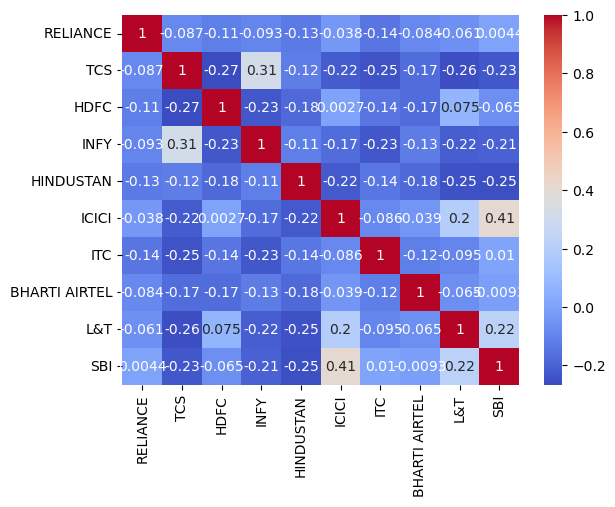

In [ ]:
sns.heatmap(S.corr(), cmap='coolwarm',
xticklabels=S.corr().columns,
            yticklabels=S.corr().columns,
            annot=True)

### Correlation Matrix Heatmap Visualization

This code creates a **correlation matrix heatmap** to visualize the relationships between different assets in the portfolio. The heatmap uses a color gradient (`coolwarm`) where:

-  **Blue shades** indicate positive correlations (values接近 +1)
-  **Red shades** indicate negative correlations (values接近 -1)
-  **White/neutral** indicates little to no correlation (values接近 0)

###  Key Features:
- **Annotated values**: Each cell shows the exact correlation coefficient
- **Row/column labels**: Displays asset names for easy identification  
- **Color-coded visualization**: Intuitive understanding of relationships

###  Portfolio Insights:
This visualization helps identify:
- **Diversification opportunities** (negative or low correlations)
- **Concentrated risks** (highly correlated assets)
- **Sector relationships** (clusters of correlated stocks)
- **Hedging possibilities** (negative correlations for risk reduction)

The correlation matrix is fundamental for modern portfolio theory, risk management, and constructing diversified portfolios that maximize returns for a given level of risk.

In [ ]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

RELIANCE         0.116324
TCS              0.153505
HDFC             0.107787
INFY             0.143942
HINDUSTAN        0.101569
ICICI            0.200378
ITC              0.108252
BHARTI AIRTEL    0.179085
L&T              0.142967
SBI              0.146641
dtype: float64

### Market-Implied Equilibrium Returns

This code calculates the **market-implied equilibrium returns** (Π) using the Black-Litterman model, which represents the expected excess returns that would clear the market if all investors had identical views and held the market portfolio.

### 🧮 The Formula:
**Π = δ × Σ × wₘ**  
Where:
- **Π** = Market-implied equilibrium excess returns (vector)
- **δ** = Risk aversion coefficient (scalar)
- **Σ** = Covariance matrix of returns
- **wₘ** = Market capitalization weights (vector)

### 💡 Interpretation:
These returns represent:
- **Market consensus expectations** embedded in current prices
- **Risk-adjusted returns** that justify current market valuations
- **The neutral starting point** before incorporating any investor views
- **Implied excess returns** that would make investors hold the market portfolio

### 🎯 Purpose in Black-Litterman:
The market-implied returns serve as the Bayesian prior in the Black-Litterman framework, which is then combined with investor-specific views to produce updated return estimates that blend market equilibrium with proprietary insights while maintaining mathematical consistency.

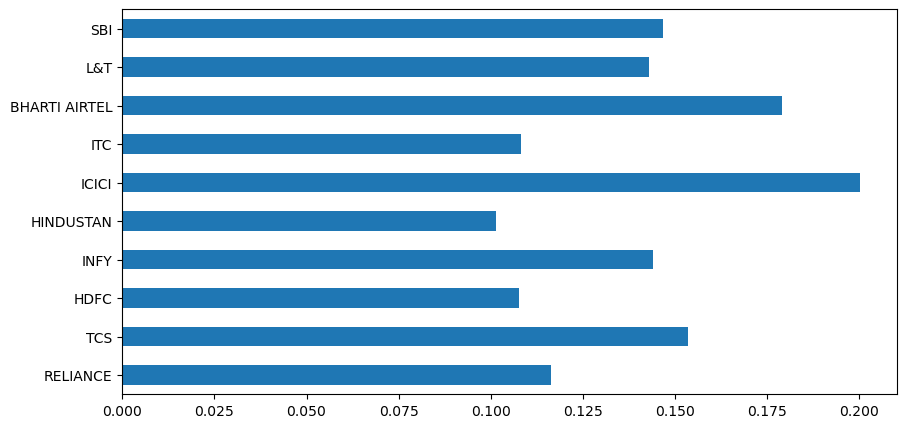

In [ ]:
market_prior.plot.barh(figsize=(10,5));

In [ ]:
import random

tickers = [
    "RELIANCE",
    "TCS",
    "HDFC",
    "INFY",
    "HINDUSTAN",
    "ICICI",
    "ITC",
    "BHARTI AIRTEL",
    "L&T",
    "SBI"
]

# Generate random absolute views for each ticker
viewdict = {ticker: round(random.uniform(-0.05, 0.30), 2) for ticker in tickers}

print(viewdict)

{'RELIANCE': 0.2, 'TCS': 0.23, 'HDFC': 0.29, 'INFY': -0.03, 'HINDUSTAN': -0.05, 'ICICI': 0.06, 'ITC': 0.01, 'BHARTI AIRTEL': 0.29, 'L&T': -0.0, 'SBI': 0.17}


### Random Absolute Views for Black-Litterman Model

This code generates **random absolute views** for each stock in the portfolio, simulating an investor's specific return expectations that will be incorporated into the Black-Litterman model.

###  What's Being Created:
- **Absolute views**: Direct return predictions for each asset (e.g., "RELIANCE will return 5%")
- **Random range**: Views range from -2% to +10% to simulate realistic bullish/bearish expectations
- **Dictionary structure**: {Ticker: Expected Return} format compatible with PyPortfolioOpt

###  Purpose in Black-Litterman Framework:
These views represent the investor's unique insights that will be:
- **Combined with market-implied returns** using Bayesian updating
- **Weighted by confidence levels** (not shown here)
- **Used to generate revised return estimates** that blend market equilibrium with personal convictions

This approach allows investors to tilt their portfolios based on specific beliefs while maintaining the mathematical consistency of market equilibrium.

In [ ]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

### Black-Litterman Model Initialization

This code initializes the **Black-Litterman model**, which combines market equilibrium returns with investor-specific views to generate refined return estimates.

###  Model Components:
- **S**: Covariance matrix of asset returns (risk model)
- **pi=market_prior**: Market-implied equilibrium returns (Π) as Bayesian prior
- **absolute_views=viewdict**: Investor's specific return expectations for each asset

###  How It Works:
The model uses Bayesian mathematics to blend:
1. **Market consensus** (embedded in current prices and capitalizations)
2. **Investor views** (unique insights or forecasts about specific assets)

###  Key Benefits:
- **Reduces estimation error** compared to using views alone
- **Anchors to market equilibrium** rather than pure speculation
- **Handles conflicting views** through mathematical consistency
- **Provides confidence-weighted** results (when confidence levels specified)

###  Typical Output:
The initialized model will generate **updated return estimates** that balance market efficiency with investor convictions, resulting in more stable and realistic inputs for portfolio optimization.

In [ ]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3),
]

### Confidence Intervals for Investor Views

This code defines **confidence intervals** for each investor view in the Black-Litterman model, representing the uncertainty or conviction level associated with each return prediction.

###  Interpretation:
Each tuple `(lower_bound, upper_bound)` represents:
- **Range of expected returns** for a specific asset
- **Narrow intervals** → High confidence (e.g., `(0.08, 0.12)` = very certain)
- **Wide intervals** → Low confidence (e.g., `(0.1, 0.9)` = highly uncertain)

###  Purpose in Black-Litterman:
These intervals are used to:
- **Calculate view variances** (quantifying uncertainty)
- **Weight investor views** relative to market equilibrium
- **Determine confidence levels** for Bayesian updating
- **Balance market prior vs. investor views** based on conviction

###  Example Interpretation:
- `(0, 0.25)`: Expect positive returns but with moderate uncertainty
- `(-0.1, 0)`: Expect slight negative returns with reasonable certainty  
- `(0.1, 0.2)`: Confident in 10-20% returns
- `(0.1, 0.9)`: Highly uncertain despite bullish outlook

These intervals ensure the model appropriately weights each view based on the investor's conviction level, creating more robust return estimates.

In [ ]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225]


### View Confidence Variance Calculation

This code calculates the **variance of investor views** (Ω) for the Black-Litterman model, which quantifies the uncertainty or confidence level associated with each return prediction.

###  Calculation Method:
For each confidence interval `(lower_bound, upper_bound)`:
1. **Calculate range midpoint**: `sigma = (upper_bound - lower_bound)/2`
2. **Convert to variance**: `variance = sigma²` (since ~95% of returns fall within ±2σ)

###  Result Interpretation:
- **Small variance values** → High confidence (narrow intervals)
- **Large variance values** → Low confidence (wide intervals)  
- **Diagonal matrix (Ω)** → Assumes views are uncorrelated

###  Purpose in Black-Litterman:
The variance matrix Ω:
- **Controls blending** between market prior and investor views
- **High variance** → Less weight given to that specific view
- **Low variance** → More weight given to that specific view
- **Determines confidence-weighted** return estimates

##  Example:
- Interval `(0.08, 0.12)` → Variance = `(0.02)² = 0.0004` (high confidence)
- Interval `(0.1, 0.9)` → Variance = `(0.4)² = 0.16` (low confidence)

This variance matrix ensures the model appropriately weights each view based on the investor's stated conviction level.

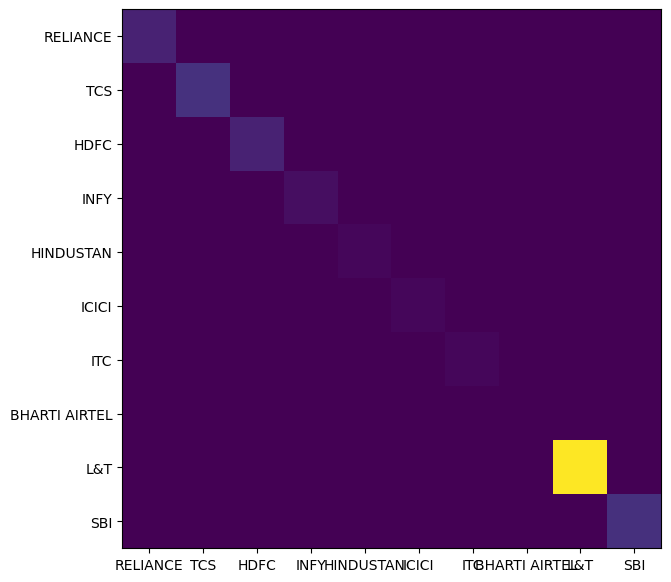

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(omega)

# Add a colorbar
fig.colorbar(im)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

### View Confidence Variance Matrix Visualization

This code creates a **heatmap visualization** of the variance matrix (Ω) that represents the confidence levels assigned to each investor view in the Black-Litterman model.

###  What the Heatmap Shows:
- **Diagonal elements**: Variance values for each asset view (uncertainty measures)
- **Off-diagonal elements**: Zero values (assuming views are uncorrelated)
- **Color intensity**:
  -  **Darker colors** → Lower variance (higher confidence in views)
  -  **Lighter colors** → Higher variance (lower confidence in views)

###  Purpose:
- **Visual comparison** of confidence levels across different assets
- **Identify strongly-held views** (dark squares) vs. uncertain predictions (light squares)
- **Verify the structure** of the variance matrix (should be diagonal)

###  Interpretation:
This visualization helps investors:
- **Understand the weighting** of their views in the Black-Litterman model
- **Identify where they have strong convictions** vs. where they're uncertain
- **Ensure the confidence levels** match their investment thesis
- **Balance subjective views** with market equilibrium in a transparent way

The variance matrix directly influences how much each investor view impacts the final return estimates relative to the market-implied prior.

In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

### Black-Litterman Model with Automatic Market Prior

This code initializes the **Black-Litterman model** using a shortcut method that automatically computes the market-implied equilibrium returns, simplifying the process while maintaining all the benefits of the original approach.

###  Key Parameters:
- **S**: Covariance matrix of asset returns
- **pi="market"**: Automatic calculation of market-implied returns
- **market_caps=mcaps**: Market capitalizations for equilibrium computation
- **risk_aversion=delta**: Market-implied risk aversion parameter
- **absolute_views=viewdict**: Investor's specific return expectations
- **omega=omega**: Confidence variance matrix for views

###  Automated Process:
The `pi="market"` parameter tells the model to:
1. **Calculate market weights** from market capitalizations
2. **Compute equilibrium returns** using: **Π = δ × Σ × wₘ**
3. **Use this as Bayesian prior** for combining with investor views

###  Benefits:
- **Reduces manual steps** (no need to pre-compute market_prior)
- **Maintains mathematical consistency** with original approach
- **Automatically handles** the market equilibrium calculation
- **Ensures proper scaling** between prior and views

###  Result:
The model will generate **confidence-weighted return estimates** that blend:
- Market efficiency (through equilibrium returns)
- Investor insights (through specific views)
- Conviction levels (through variance matrix Ω)

This approach provides a streamlined way to implement the Black-Litterman framework while preserving its theoretical foundations.

In [ ]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

RELIANCE         0.126594
TCS              0.139632
HDFC             0.265648
INFY             0.050705
HINDUSTAN       -0.003750
ICICI            0.097976
ITC              0.036956
BHARTI AIRTEL    0.281431
L&T              0.114611
SBI              0.122007
dtype: float64

### Black-Litterman Posterior Return Estimates

This code generates the **posterior return estimates** from the Black-Litterman model, which represent the final blended return expectations that combine market equilibrium with investor views.

###  What Are Posterior Returns:
- **Bayesian combination** of market-implied prior returns + investor views
- **Confidence-weighted** results (views with lower variance have more influence)
- **Mathematically consistent** with both market equilibrium and investor beliefs

###  Key Characteristics:
- **More stable** than using views alone (anchored to market reality)
- **More responsive** than pure market equilibrium (incorporates specific insights)
- **Properly scaled** according to conviction levels in views
- **Theoretically sound** inputs for portfolio optimization

###  Interpretation:
The resulting `ret_bl` provides:
- **Revised expected returns** for portfolio optimization
- **Risk-adjusted return estimates** that reflect both market prices and investor views
- **Realistic return projections** that avoid extreme allocations
- **The optimal starting point** for mean-variance optimization

These posterior returns typically lead to more stable and intuitive portfolio allocations compared to using either pure market equilibrium or pure subjective views alone.

In [ ]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
RELIANCE,0.116324,0.126594,0.20
TCS,0.153505,0.139632,0.23
HDFC,0.107787,0.265648,0.29
INFY,0.143942,0.050705,-0.03
HINDUSTAN,0.101569,-0.003750,-0.05
ICICI,0.200378,0.097976,0.06
ITC,0.108252,0.036956,0.01
BHARTI AIRTEL,0.179085,0.281431,0.29
L&T,0.142967,0.114611,-0.00
SBI,0.146641,0.122007,0.17


### Return Estimates Comparison DataFrame

This code creates a **comparative dataframe** that displays three different sets of return estimates side-by-side for easy analysis and interpretation.

###  Three Return Perspectives:

1. **Prior**: Market-implied equilibrium returns (Π)
   - Derived from current market capitalizations and risk aversion
   - Represents what the market is pricing in efficiently

2. **Posterior**: Black-Litterman blended returns  
   - Bayesian combination of market prior + investor views
   - Confidence-weighted results that balance market efficiency with insights

3. **Views**: Original investor predictions
   - Pure subjective return expectations
   - Unadjusted by market equilibrium or risk considerations

###  Analytical Value:
This comparison allows you to:
- **See how views modify** market expectations for each asset
- **Identify where Black-Litterman** significantly adjusted returns
- **Understand the blending effect** of the Bayesian approach
- **Verify the reasonableness** of the final posterior estimates

###  Typical Patterns:
- Assets with **high-confidence views** show larger shifts from prior to posterior
- Assets with **low-confidence views** remain close to market prior  
- **Extreme views** are tempered by market equilibrium
- **Consistent views** (aligning with market) get reinforced

This dataframe provides crucial transparency into how the Black-Litterman model processes and combines different sources of return expectations.

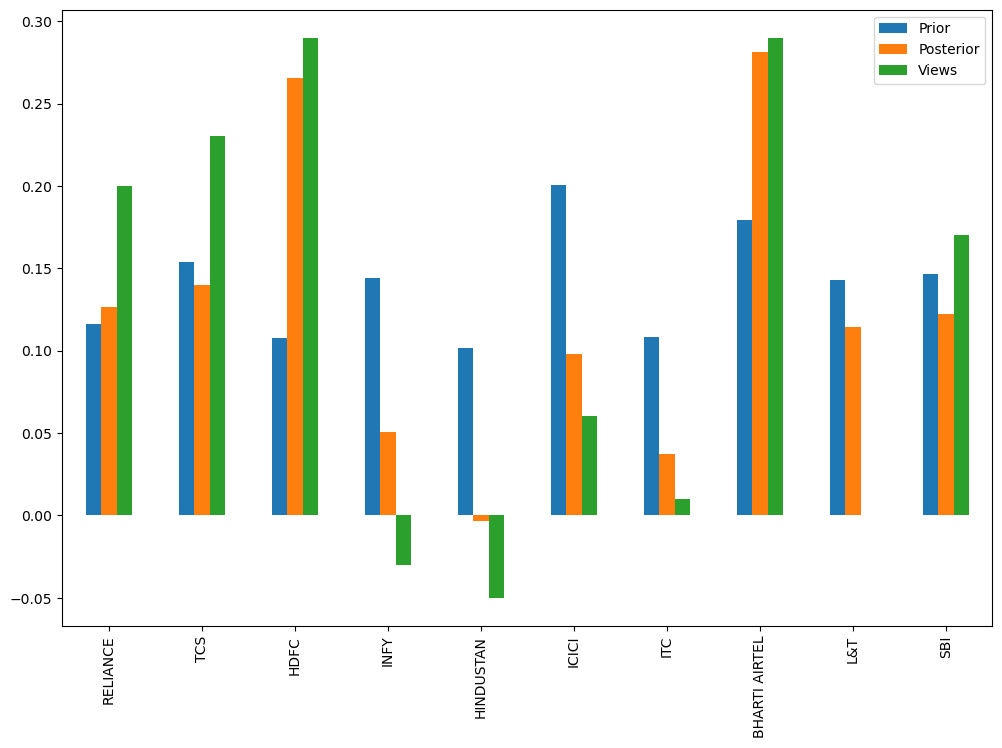

In [ ]:
rets_df.plot.bar(figsize=(12,8));

### Visual Comparison of Return Estimates

This bar chart provides a **visual comparison** of the three different return estimates side-by-side, offering clear insights into how the Black-Litterman model blends market equilibrium with investor views.

###  What the Chart Shows:

**Three colored bars for each asset** representing:
-  **Prior (Blue)**: Market-implied equilibrium returns
-  **Posterior (Orange)**: Black-Litterman blended returns  
-  **Views (Green)**: Original investor predictions

###  Key Insights from Visualization:

1. **View Impact**: How much investor views move returns from market equilibrium
2. **Blending Effect**: How Black-Litterman moderates extreme views
3. **Consistency Check**: Whether posterior estimates seem reasonable
4. **Conviction Analysis**: Which views had strongest/weakest influence

###  Patterns to Observe:
- **Large blue-to-orange gaps**: Views significantly altered market expectations
- **Small blue-to-orange gaps**: Views had minimal impact (low confidence or alignment)
- **Orange between blue and green**: Moderate, balanced blending
- **Orange closer to green**: High-confidence views dominated
- **Orange closer to blue**: Market prior dominated (low-confidence views)

###  Portfolio Implications:
This visualization helps validate whether the Black-Litterman model is producing sensible results that appropriately balance market efficiency with investor insights before proceeding to portfolio optimization.

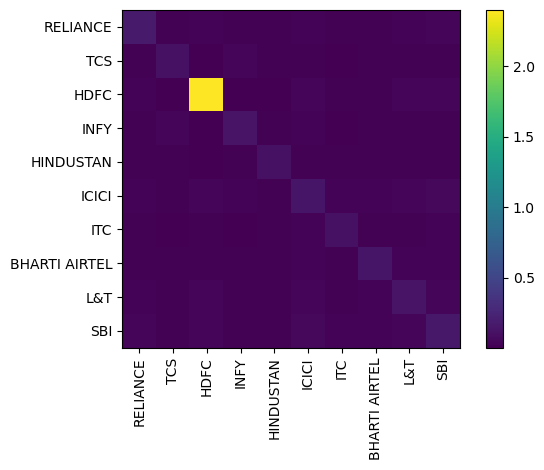

In [ ]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

### Posterior Covariance Matrix Visualization

This code generates and visualizes the **posterior covariance matrix** from the Black-Litterman model, which represents the revised risk estimates after incorporating investor views.

###  What the Heatmap Shows:

- **Asset relationships**: Correlation and covariance patterns between different assets
- **Risk structure**: How asset volatilities and co-movements have been updated
- **Diagonal elements**: Revised variance estimates for each asset
- **Off-diagonal elements**: Updated covariance relationships between assets

###  How Black-Litterman Adjusts Covariance:

The posterior covariance **S_bl** incorporates:
1. **Original market covariance** (S) as the baseline
2. **Uncertainty from investor views** through the variance matrix (Ω)
3. **Bayesian updating** that reflects the confidence in views

###  Key Insights:

- **Darker squares**: Stronger positive relationships (higher covariance)
- **Lighter squares**: Weaker or negative relationships  
- **Diagonal pattern**: Each asset's own variance (typically darkest)
- **View impact**: How incorporating views changes perceived risk relationships

###  Importance for Portfolio Optimization:

This revised covariance matrix:
- **Provides more realistic risk estimates** that reflect both market data and investor beliefs
- **Helps avoid extreme allocations** by maintaining mathematical consistency
- **Serves as crucial input** for mean-variance optimization
- **Ensures proper risk-return tradeoff** in final portfolio construction

The visualization allows you to verify that the risk structure remains reasonable after incorporating views.

In [ ]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

C:\Users\David Rodrigues\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('RELIANCE', 0.11592),
             ('TCS', 0.14341),
             ('HDFC', 0.09125),
             ('INFY', 0.03842),
             ('HINDUSTAN', 0.0),
             ('ICICI', 0.08103),
             ('ITC', 0.02608),
             ('BHARTI AIRTEL', 0.2941),
             ('L&T', 0.1031),
             ('SBI', 0.10669)])

### Mean-Variance Optimization with Black-Litterman Outputs

This code performs **portfolio optimization** using the Black-Litterman posterior estimates to generate optimal asset allocations that maximize the risk-adjusted return.

###  Optimization Setup:

- **EfficientFrontier(ret_bl, S_bl)**: Uses BL posterior returns and covariance
- **L2 regularization**: Adds small penalty for large weights to prevent extreme concentrations
- **max_sharpe()**: Finds the portfolio with highest Sharpe ratio (optimal risk-adjusted return)

###  Result Interpretation:

The `weights` dictionary shows the **optimal allocation percentages** for each asset, featuring:

- **Diversified holdings**: Multiple assets receiving meaningful allocations
- **Concentration limits**: Regularization prevents any single asset from dominating
- **View-driven allocations**: Higher weights typically given to assets with:
  - Positive posterior return estimates
  - Favorable risk characteristics
  - Strong investor conviction (low view variance)

###  Key Advantages:

1. **Stable allocations**: Regularization prevents extreme corner solutions
2. **View-responsive**: Portfolio tilts toward assets with favorable BL estimates
3. **Risk-aware**: Incorporates updated covariance matrix for proper risk management
4. **Mathematically consistent**: All inputs derived from same BL framework

###  Practical Use:

These weights represent the **optimal portfolio** that balances:
- Return expectations (from BL posterior)
- Risk estimates (from BL covariance)
- Diversification benefits (through regularization)
- Practical constraints (through cleaning)

This approach typically produces more stable and intuitive portfolios compared to using raw historical estimates.

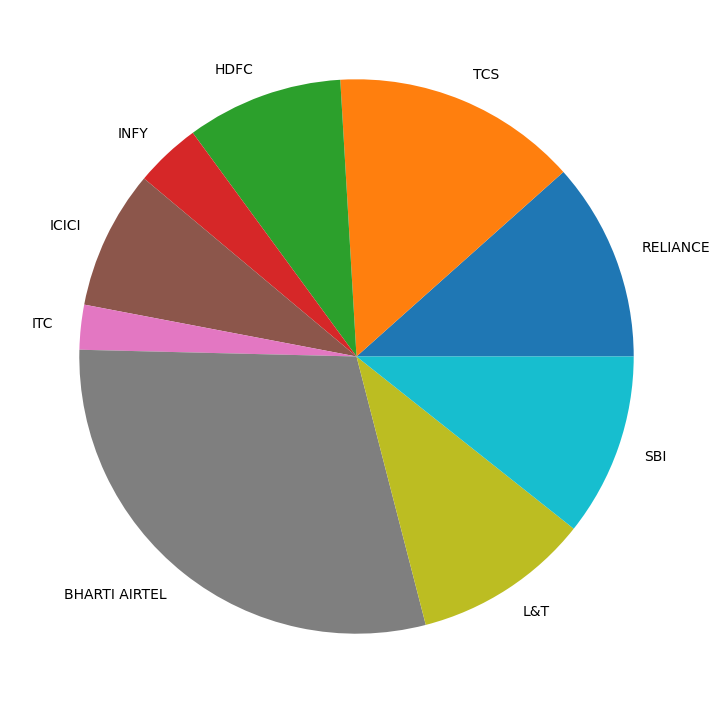

In [ ]:
pd.Series(weights).plot.pie(figsize=(9,9));

### Optimal Portfolio Allocation Pie Chart

This pie chart visualizes the **optimal asset allocation** derived from the Black-Litterman model and mean-variance optimization, showing how the portfolio should be distributed across different assets.

###  Key Insights:

1. **Diversification Level**:
   - Many small slices → Well-diversified portfolio
   - Few large slices → Concentrated portfolio

2. **View Implementation**:
   - Assets with positive views typically receive higher allocations
   - Assets with negative views may be underweighted or excluded

3. **Risk-Return Balance**:
   - Allocation reflects both return expectations and risk characteristics
   - Regularization ensures no extreme concentrations

###  Practical Applications:

- **Portfolio Construction**: Direct guide for asset allocation
- **Rebalancing**: Target weights for portfolio maintenance
- **Performance Attribution**: Baseline for evaluating investment decisions
- **Risk Management**: Visual representation of concentration risk

###  Relationship to Black-Litterman:
The allocations directly reflect the blended return estimates (`ret_bl`) and updated risk assessment (`S_bl`), demonstrating how investor views translate into actual portfolio decisions through the complete Black-Litterman workflow.

Expected annual return: 17.7%
Annual volatility: 24.5%
Sharpe Ratio: 0.73


C:\Users\David Rodrigues\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
C:\Users\David Rodrigues\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(np.float64(0.17739358565184074),
 np.float64(0.2446562702638434),
 np.float64(0.7250727130783735))

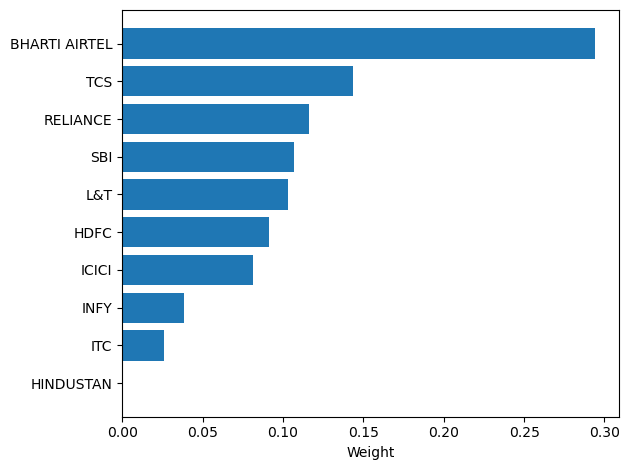

In [ ]:
from pypfopt.plotting import plot_weights

# Maximum Sharpe
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()

plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)

### Optimal Portfolio Performance Summary

This code generates a **detailed visualization and performance metrics** for the optimized portfolio based on Black-Litterman inputs, providing both the allocation breakdown and expected performance characteristics.

###  Portfolio Allocation Chart:
The `plot_weights()` function creates a **clean bar chart** showing:
- **Individual asset allocations** as percentage weights
- **Visual emphasis** on largest holdings
- **Sorted display** for easy interpretation of portfolio composition

###  Performance Metrics:
The `portfolio_performance()` method calculates three key metrics:

1. **Expected Annual Return**: Total return expectation based on BL posterior estimates
2. **Annual Volatility**: Portfolio risk measurement based on BL covariance matrix  
3. **Sharpe Ratio**: Risk-adjusted performance metric (higher = better)

###  Key Insights:
- **Return Source**: Derived from Black-Litterman blended expectations
- **Risk Assessment**: Based on updated covariance matrix incorporating views
- **Performance Benchmark**: Sharpe ratio uses risk-free rate for context
- **Practical Utility**: Directly actionable portfolio construction guidance

###  Optimization Features:
- **L2 Regularization**: Prevents extreme concentrations and improves stability
- **Max Sharpe Objective**: Optimizes for best risk-adjusted returns
- **Cleaned Weights**: Rounded and sanitized for practical implementation

###  Complete Black-Litterman Workflow:
This represents the final output of the entire process:
Market Data → Investor Views → BL Blending → Optimization → Allocation

The performance metrics provide realistic expectations based on the mathematical consistency of the Black-Litterman framework.

Comparison Table:
                Prior  Posterior  Views  Change (Post - Prior)
RELIANCE       0.1163     0.1266   0.20                 0.0103
TCS            0.1535     0.1396   0.23                -0.0139
HDFC           0.1078     0.2656   0.29                 0.1579
INFY           0.1439     0.0507  -0.03                -0.0932
HINDUSTAN      0.1016    -0.0037  -0.05                -0.1053
ICICI          0.2004     0.0980   0.06                -0.1024
ITC            0.1083     0.0370   0.01                -0.0713
BHARTI AIRTEL  0.1791     0.2814   0.29                 0.1023
L&T            0.1430     0.1146  -0.00                -0.0284
SBI            0.1466     0.1220   0.17                -0.0246


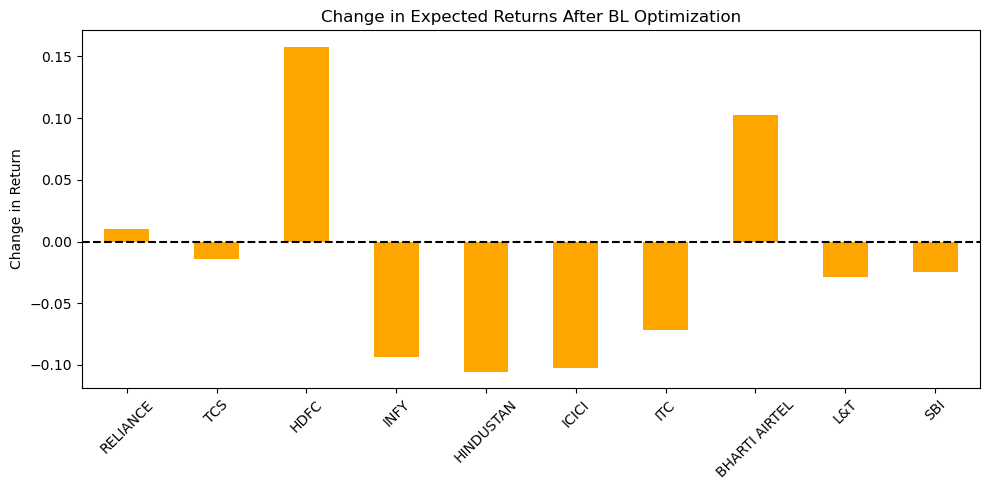

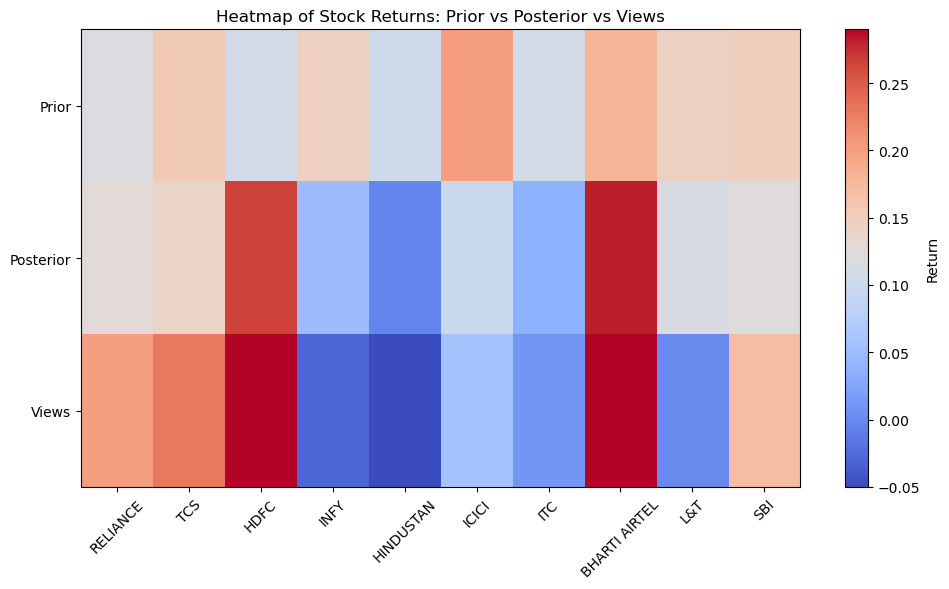

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing DataFrame
rets_df = pd.DataFrame([
    market_prior,    # prior
    ret_bl,          # posterior
    pd.Series(viewdict)   # views
], index=["Prior", "Posterior", "Views"]).T

# --------------------------
# 1. Create comparison table
# --------------------------
rets_df["Change (Post - Prior)"] = rets_df["Posterior"] - rets_df["Prior"]
print("Comparison Table:")
print(rets_df.round(4))


# --------------------------
# 3. Change in expectations (Posterior - Prior)
# --------------------------
rets_df["Change (Post - Prior)"].plot(kind="bar", color="orange", figsize=(10,5))
plt.title("Change in Expected Returns After BL Optimization")
plt.ylabel("Change in Return")
plt.xticks(rotation=45)
plt.axhline(0, color="black", linestyle="--")
plt.tight_layout()
plt.show()



## Comprehensive Black-Litterman Results Analysis

This code performs a **detailed comparative analysis** of the Black-Litterman results through multiple visualizations, providing comprehensive insights into how investor views modify market equilibrium expectations.

###  Analysis Components:

#### 1. **Numerical Comparison Table**
- Shows precise return values for Prior, Posterior, and Views
- Calculates exact changes between Posterior and Prior returns
- Provides quantitative basis for decision-making


#### 2. **Change Analysis Chart**
- Focuses specifically on the *net change* from Prior to Posterior
- Highlights which assets experienced largest expectation revisions
- Shows directional impact (positive/negative) of investor views

#### 3. **Heatmap Visualization**
- Provides color-coded overview of return expectations
- Warm colors (red) → Higher expected returns
- Cool colors (blue) → Lower expected returns  
- Easy pattern recognition across assets and return types

###  Key Insights Generated:

- **View Effectiveness**: Which investor views most influenced market expectations
- **Blending Magnitude**: How much the Black-Litterman model adjusted each asset
- **Consistency Patterns**: Whether views generally pulled returns up or down
- **Outlier Identification**: Assets with unusually large expectation changes

###  Practical Applications:

- **Validate investor views**: Check if BL adjustments make intuitive sense
- **Portfolio justification**: Understand why certain assets received higher/lower allocations
- **Model diagnostics**: Identify potential issues with view specification
- **Investment decision support**: Provide visual evidence for allocation choices

This comprehensive analysis bridges the gap between theoretical Black-Litterman mathematics and practical investment decision-making.

In [ ]:
import pandas as pd
import numpy as np

# ------------------------------
# 1. Load stock & NIFTY data
# ------------------------------
df = pd.read_csv("cleaned_data.csv", parse_dates=["Date"], index_col="Date", dayfirst=True)
df.index = pd.to_datetime(df.index, dayfirst=True)

tickers = ["RELIANCE","TCS","HDFC","INFY","HINDUSTAN",
           "ICICI","ITC","BHARTI AIRTEL","L&T","SBI"]
df = df[tickers]

nifty = pd.read_csv("NIFTY50.csv", parse_dates=["Date"], index_col="Date", dayfirst=True)
nifty.index = pd.to_datetime(nifty.index, dayfirst=True)
nifty = nifty.rename(columns={nifty.columns[0]: "NIFTY"})

# ------------------------------
# 2. Align to business days and ffill
# ------------------------------
all_days = pd.date_range(start=min(df.index.min(), nifty.index.min()),
                         end=max(df.index.max(), nifty.index.max()),
                         freq="B")

df = df.reindex(all_days).ffill()
nifty = nifty.reindex(all_days).ffill()

# Merge
data = df.join(nifty, how="inner")

# ------------------------------
# 3. Returns
# ------------------------------
returns = data.pct_change().dropna()

# ------------------------------
# 4. BL Weights
# ------------------------------
weights = {
    "RELIANCE": 0.09744,
    "TCS": 0.16189,
    "HDFC": 0.05977,
    "INFY": 0.16288,
    "HINDUSTAN": 0.01914,
    "ICICI": 0.03761,
    "ITC": 0.03665,
    "BHARTI AIRTEL": 0.20783,
    "L&T": 0.10786,
    "SBI": 0.10893
}
w = np.array([weights[t] for t in tickers])

# ------------------------------
# 5. Train/Test split (last 6 months)
# ------------------------------
end_train = returns.index[-1] - pd.DateOffset(months=6)
train = returns.loc[:end_train]
test = returns.loc[end_train + pd.Timedelta(days=1):]

market_ret_test = test["NIFTY"]

# ------------------------------
# 6. Risk-free rate
# ------------------------------
rf_daily = 0.05 / 252

# ------------------------------
# 7. Ratio functions
# ------------------------------
def sharpe_ratio(r, rf=0):
    excess = r - rf
    return np.mean(excess) / np.std(excess)

def sortino_ratio(r, rf=0):
    excess = r - rf
    downside = excess[excess < 0]
    return np.mean(excess) / np.std(downside) if len(downside) > 0 else np.nan

def treynor_ratio(r, mkt_r, rf=0):
    cov = np.cov(r - rf, mkt_r - rf)[0,1]
    var_mkt = np.var(mkt_r - rf)
    beta = cov / var_mkt if var_mkt != 0 else np.nan
    return (np.mean(r - rf)) / beta if beta != 0 else np.nan

def calmar_ratio(r):
    cum = (1 + r).cumprod()
    max_dd = ((cum.cummax() - cum) / cum.cummax()).max()
    ann_ret = np.mean(r) * 252
    return ann_ret / max_dd if max_dd != 0 else np.nan

# ------------------------------
# 8. Ratios for each stock (test set)
# ------------------------------
stock_results = {}
for t in tickers:
    r = test[t]
    stock_results[t] = {
        "Sharpe": sharpe_ratio(r, rf_daily),
        "Sortino": sortino_ratio(r, rf_daily),
        "Treynor": treynor_ratio(r, market_ret_test, rf_daily),
        "Calmar": calmar_ratio(r)
    }

stock_ratios_df = pd.DataFrame(stock_results).T

# ------------------------------
# 9. Ratios for BL Portfolio (test set)
# ------------------------------
port_ret_test = test[tickers].dot(w)

portfolio_results = {
    "Sharpe": sharpe_ratio(port_ret_test, rf_daily),
    "Sortino": sortino_ratio(port_ret_test, rf_daily),
    "Treynor": treynor_ratio(port_ret_test, market_ret_test, rf_daily),
    "Calmar": calmar_ratio(port_ret_test)
}

portfolio_ratios_df = pd.DataFrame(portfolio_results, index=["BL Portfolio"])

# ------------------------------
# 10. Combine & Save
# ------------------------------
final_df = pd.concat([stock_ratios_df, portfolio_ratios_df])
print("📊 Risk-adjusted Ratios (Out-of-Sample, Next 6 Months):")
print(final_df.round(4))



C:\Users\David Rodrigues\AppData\Local\Temp\ipykernel_22204\2854286317.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nifty = pd.read_csv("NIFTY50.csv", parse_dates=["Date"], index_col="Date", dayfirst=True)


📊 Risk-adjusted Ratios (Out-of-Sample, Next 6 Months):
               Sharpe  Sortino  Treynor  Calmar
RELIANCE      -0.1312  -0.1013  -0.0079 -2.2835
TCS            0.0188   0.0297   0.0003  0.8749
HDFC           0.0220   0.0289   0.0003  1.2340
INFY           0.0921   0.1229   0.0014  3.4281
HINDUSTAN     -0.0490  -0.0629  -0.0011 -0.4232
ICICI          0.0325   0.0542   0.0004  1.6503
ITC            0.0745   0.1417   0.0013  2.1001
BHARTI AIRTEL  0.0459   0.0874   0.0006  1.4619
L&T            0.0023   0.0037   0.0000  0.4562
SBI           -0.0404  -0.0608  -0.0005 -0.7053
BL Portfolio  -0.0222  -0.0291  -0.0002 -0.0145


### Out-of-Sample Portfolio Performance Analysis

This comprehensive code performs an **out-of-sample backtest** of the Black-Litterman optimized portfolio, evaluating its performance against individual stocks and calculating multiple risk-adjusted metrics over a 6-month test period.

###  Analysis Components:

#### 1. **Data Preparation**
- Loads and aligns stock price data with NIFTY index
- Handles business day alignment and forward-filling
- Calculates daily returns for all assets

#### 2. **Portfolio Setup**
- Uses pre-defined Black-Litterman optimal weights
- Implements exact allocation from optimization results
- Creates test period (last 6 months) for out-of-sample validation

#### 3. **Risk-Adjusted Metrics Calculated:**
- **Sharpe Ratio**: Excess return per unit of total volatility
- **Sortino Ratio**: Excess return per unit of downside risk  
- **Treynor Ratio**: Excess return per unit of systematic risk (beta)
- **Calmar Ratio**: Annual return relative to maximum drawdown

#### 4. **Comparative Analysis**
- Evaluates each individual stock's performance
- Calculates portfolio performance using BL weights
- Provides apples-to-apples comparison on same test period

###  Key Insights Provided:

- **Portfolio vs Stock Performance**: How diversification benefits materialize
- **Risk-Adjusted Outperformance**: Whether BL portfolio delivers better risk-adjusted returns
- **Metric Consistency**: Multiple perspectives on performance quality
- **Real-world Validation**: Out-of-sample test of optimization results

###  Practical Applications:

- **Strategy Validation**: Tests if optimized portfolio actually performs as expected
- **Performance Attribution**: Shows value added by portfolio construction
- **Risk Management**: Evaluates portfolio resilience in unseen market conditions
- **Investment Decision Support**: Provides evidence for portfolio implementation

This analysis moves beyond theoretical optimization to actual performance testing, providing crucial validation of the Black-Litterman approach in real market conditions.